In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
import pdb
import json
from math import sqrt

In [2]:
file_csv = '/mnt/disk15tb/paula/Main_DA_Projects/data_analysis_output/Organoids/RETT_T2_KMB_A1/Network_outputs/Compiled_Networks_old.csv'

data_df = pd.read_csv(file_csv)


In [3]:
data_df

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,IBI,Burst_Peak,Number_Bursts,Spike_per_Burst,BurstDuration,Mean_FiringRate,Mean_SpikeAmplitude,Active_area
0,2,7,1,802F N1,09-Feb-2024 07:47:45,18908,6.572727,2.660829,45,2968.400000,1.371111,0.875254,27.216002,9.11
1,5,7,1,RTT N1,09-Feb-2024 08:21:36,19362,9.162500,3.703267,33,979.424242,1.021212,0.680146,32.711918,1.90
2,7,7,1,802F N2,09-Feb-2024 08:55:31,19401,5.690385,1.927140,53,948.792453,0.756604,0.873995,29.280083,3.93
3,9,7,1,RTT N2,09-Feb-2024 09:29:33,18656,10.655556,4.285978,28,1749.785714,0.571429,0.750180,25.289393,4.52
4,11,7,1,802F N3,09-Feb-2024 10:05:34,19388,3.481176,1.544617,86,829.906977,0.630233,1.210541,30.182331,4.65
5,13,7,1,802F N4,09-Feb-2024 10:43:45,16380,1.947712,2.170310,154,1531.831169,0.833766,2.047402,33.244313,18.28
6,15,7,1,RTT N3,09-Feb-2024 11:18:37,16795,3.964000,2.617206,76,1747.644737,0.736842,0.826272,24.485209,5.28
7,18,7,1,RTT N4,09-Feb-2024 11:55:12,16854,8.222222,2.448496,37,706.486486,0.345946,0.477513,21.201123,3.98
8,20,7,1,802F N5,09-Feb-2024 12:28:49,21684,3.664198,1.683127,82,873.219512,0.441463,0.925748,28.107871,11.98
9,22,7,1,RTT N5,09-Feb-2024 13:11:33,18646,14.742105,3.163886,20,1277.300000,0.570000,0.565637,25.533491,3.64


In [4]:
df = data_df.replace(np.NaN,0.0)

In [5]:
div = df['DIV'].unique()
print(div)


[ 0  1  3  7 22 24 27]


In [6]:
div = [ 0 , 1  ,3 , 7 ]#,22 ,24, 27]

In [7]:
unique_genotypes = df['Type'].unique()
unique_genotypes

array(['WT', 'HET'], dtype=object)

In [8]:
unique_therapy_types = df['Therapy_type'].unique()
unique_therapy_types

array(['CRISPRa', 'Control (GFP)', 'AAV'], dtype=object)

In [9]:
#unique_genotypes=['WT',  'HET']
#colors = ['lightsteelblue','cornflowerblue','royalblue','indianred','brown']
colors = ['royalblue','brown']

In [10]:
#unique_genotypes = [ 'ADNP2_WT2', 'ADNP3_WT','ADNP3_HET']
markers = ['o','s','d','*','^']

# excludes the chips , outlier removal

In [11]:
#Enter the  chip well ( key: vlaue) here to exclude.
exclude_dict = {'M07295':3}

if exclude_dict:
    # Using list comprehension for filtering
    print("hello")
    mask = [(row.Type=='xx')or(row.Type=='yy') or ((row.Chip_ID in exclude_dict) and (row.Well == exclude_dict[row.Chip_ID])) for index, row in df.iterrows()]

    df = df[~pd.Series(mask)]


hello


combine based on therapy type

In [13]:
unique_type_therapy_combinations = df[['Type', 'Therapy_type']].drop_duplicates()
wt_combinations = unique_type_therapy_combinations[unique_type_therapy_combinations['Type'] == 'WT']
het_combinations = unique_type_therapy_combinations[unique_type_therapy_combinations['Type'] == 'HET']
df['Chip_Well_Therapy_Key'] = df['Chip_ID'] + '_Well_' + df['Well'].astype(str) + '_Therapy_' + df['Therapy_type'].astype(str)
# Define color maps for WT and HET types
wt_colors = plt.cm.Blues(np.linspace(0.5, 1, len(wt_combinations)))
het_colors = plt.cm.Reds(np.linspace(0.5, 1, len(het_combinations)))

# Create color maps
color_map = {}
for (ttype, therapy), color in zip(wt_combinations.values, wt_colors):
    color_map[f'WT_{therapy}'] = color
for (ttype, therapy), color in zip(het_combinations.values, het_colors):
    color_map[f'HET_{therapy}'] = color
# Define a list of markers
markers = ['o', 's', '^', 'd', 'x', '+', '*', 'p', 'h', 'v', '<', '>', '|', '_']

# Ensure there are enough markers for each combination; if not, cycle through them
if len(df['Chip_Well_Therapy_Key'].unique()) > len(markers):
    markers *= int(np.ceil(len(df['Chip_Well_Therapy_Key'].unique()) / len(markers)))

# Assign a marker to each Chip_Well_Key
marker_map = dict(zip(df['Chip_Well_Therapy_Key'].unique(), markers))

#line plots

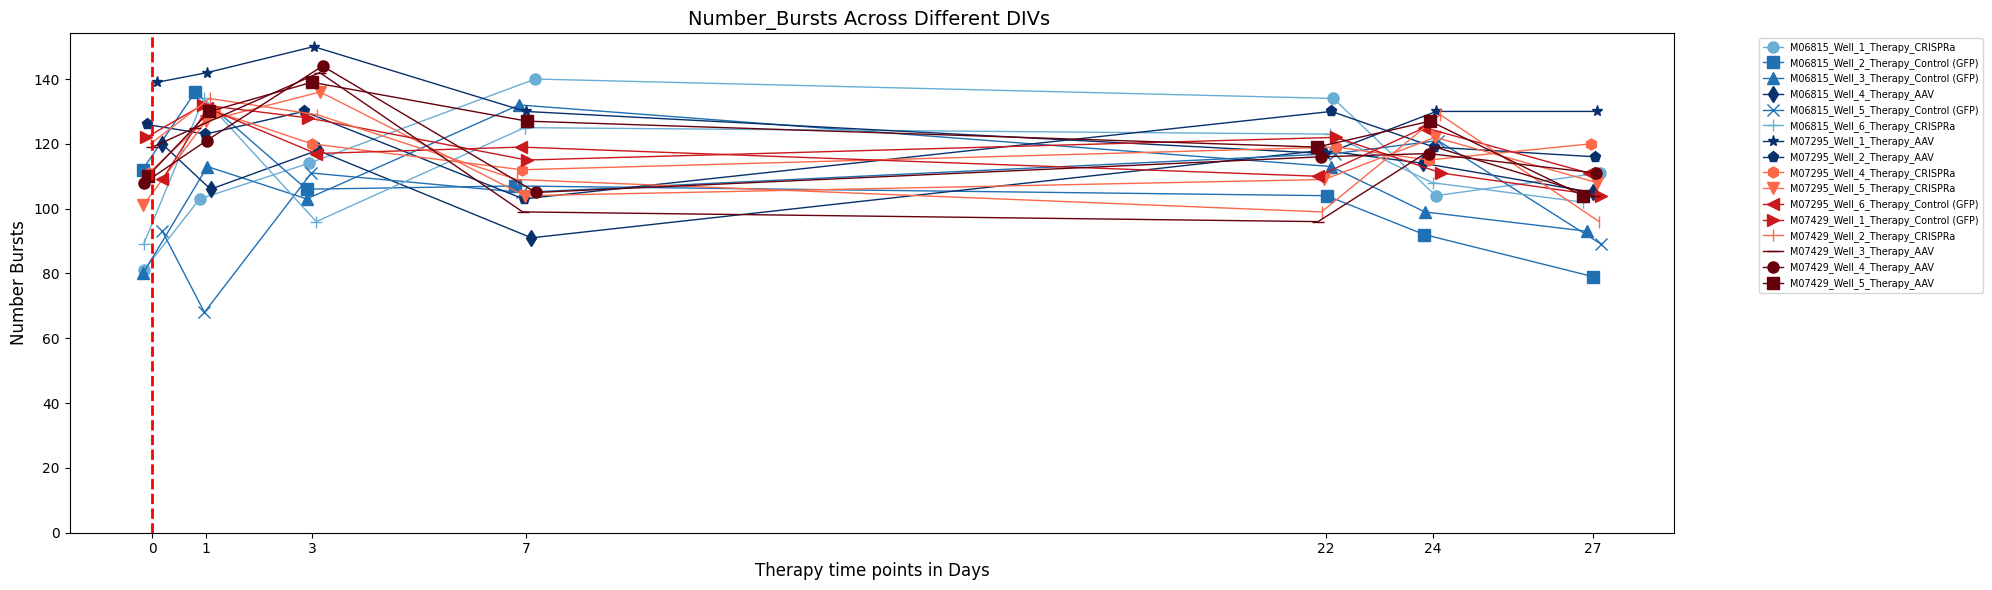

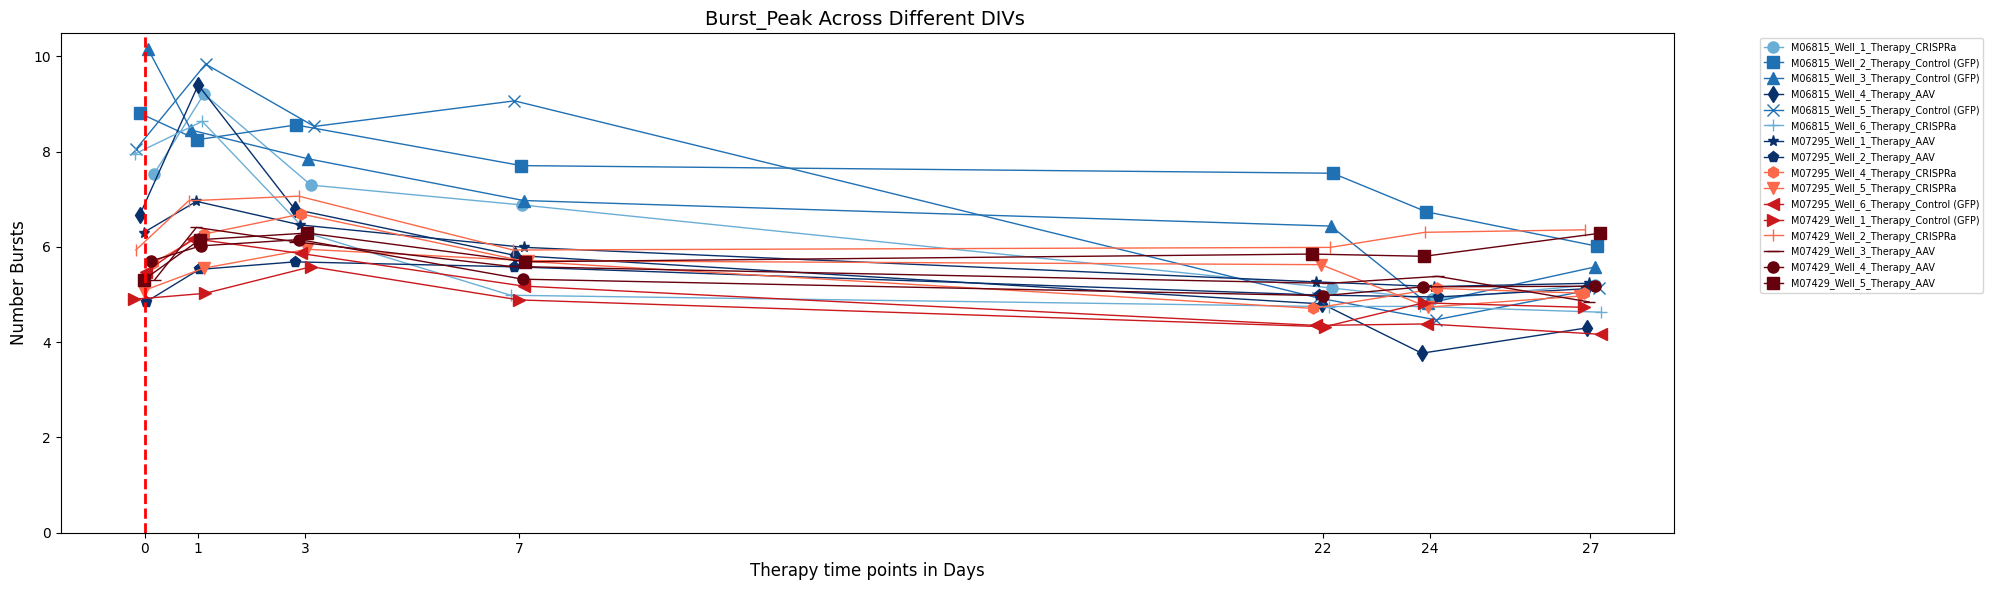

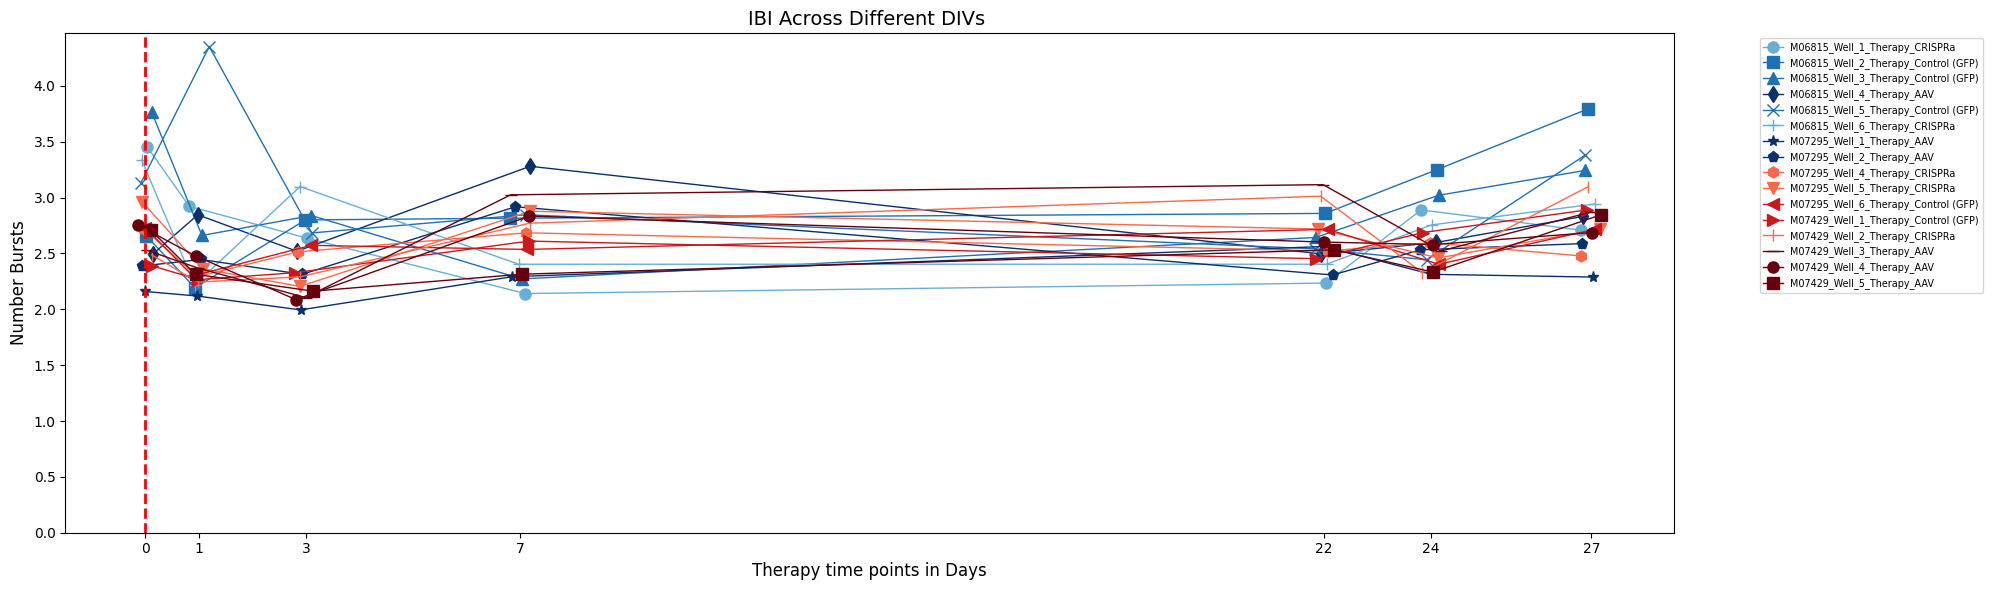

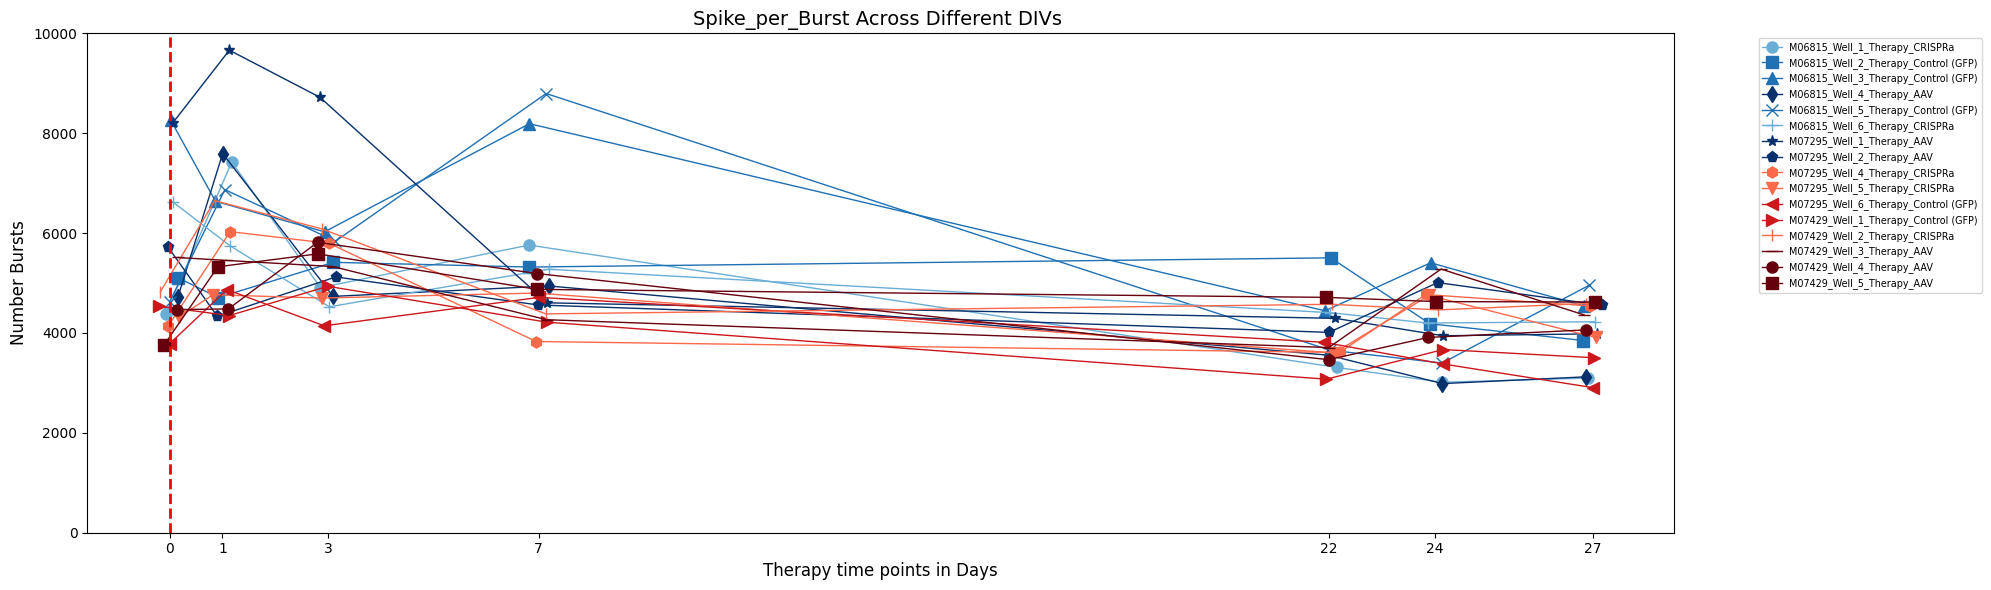

In [14]:
output_types = ["Number_Bursts","Burst_Peak","IBI","Spike_per_Burst"]

# Assuming 'df' is your DataFrame
for output_type in output_types:
    # Create a combined key for Chip_ID, Well, and Therapy_Type
    #df['Chip_Well_Therapy_Key'] = df['Chip_ID'] + '_Well_' + df['Well'].astype(str) + '_Therapy_' + df['Therapy_type'].astype(str)

    # Generate unique keys for the color map based on Type and Therapy_Type
    unique_type_therapy_combinations = df[['Type', 'Therapy_type']].drop_duplicates()
    wt_combinations = unique_type_therapy_combinations[unique_type_therapy_combinations['Type'] == 'WT']
    het_combinations = unique_type_therapy_combinations[unique_type_therapy_combinations['Type'] == 'HET']

    # Define color maps for WT and HET types
    wt_colors = plt.cm.Blues(np.linspace(0.5, 1, len(wt_combinations)))
    het_colors = plt.cm.Reds(np.linspace(0.5, 1, len(het_combinations)))

    # Create color maps
    color_map = {}
    for (ttype, therapy), color in zip(wt_combinations.values, wt_colors):
        color_map[f'WT_{therapy}'] = color
    for (ttype, therapy), color in zip(het_combinations.values, het_colors):
        color_map[f'HET_{therapy}'] = color
    # Define a list of markers
    markers = ['o', 's', '^', 'd', 'x', '+', '*', 'p', 'h', 'v', '<', '>', '|', '_']

    # Ensure there are enough markers for each combination; if not, cycle through them
    if len(df['Chip_Well_Therapy_Key'].unique()) > len(markers):
        markers *= int(np.ceil(len(df['Chip_Well_Therapy_Key'].unique()) / len(markers)))

    # Assign a marker to each Chip_Well_Key
    marker_map = dict(zip(df['Chip_Well_Therapy_Key'].unique(), markers))
    def jitter(x, jitter_strength=0.1):
        return x + np.random.uniform(-jitter_strength, jitter_strength, size=np.shape(x))
    # Plotting with jitter and color coding based on Type and Therapy_Type
    fig, ax = plt.subplots(figsize=(20, 6))

    for combo in df['Chip_Well_Therapy_Key'].unique():
        combo_data = df[df['Chip_Well_Therapy_Key'] == combo]
        key_for_color = f"{combo_data['Type'].iloc[0]}_{combo_data['Therapy_type'].iloc[0]}"
        color = color_map[key_for_color]
        
        # Apply jitter
        jittered_DIV = jitter(combo_data['DIV'], jitter_strength=0.2)  # Adjust jitter strength as needed
        
        ax.plot(jittered_DIV, combo_data[output_type], label=f'{combo}',
                color=color, marker=marker_map[combo], linestyle='-', linewidth=1, markersize=8)

    ax.set_xticks(combo_data['DIV'])  # Set ticks at every available DIV position
    #ax.set_xticklabels(unique_divs)  # Label the ticks with the actual DIV values

    # Customizing the plot
    ax.set_ylim(bottom=0)
    ax.set_xlabel('Therapy time points in Days', fontsize=12)
    ax.set_ylabel('Number Bursts', fontsize=12)
    ax.set_title(f'{output_type} Across Different DIVs ', fontsize=14)
    ax.axvline(x=0,color='r',linestyle='--',linewidth=2)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small', ncol=1)

    plt.tight_layout()
    plt.show()

combine thereapy types and also plot the percentage change

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example DataFrame loading step is skipped, ensure 'df' is properly initialized
output_types = ["Number_Bursts","Burst_Peak","IBI","Spike_per_Burst"]

# Assuming 'df' is your DataFrame
for output_type in output_types:
    # Adjusting DataFrame columns as per your existing code setup
    df['Chip_Well_Therapy_Key'] = df['Chip_ID'] + '_Well_' + df['Well'].astype(str) + '_Therapy_' + df['Therapy_type'].astype(str)
    df['Type_Therapy_Key'] = 'Type_' + df['Type'] + '_Therapy_' + df['Therapy_type'].astype(str)

    # Assuming 'Percentage_Change' calculation is already handled as per your setup
    # Calculate the baseline (DIV==0) value for each Chip_Well_Therapy_Key
    baseline_values = df[df['DIV'] == 0].groupby('Chip_Well_Therapy_Key')[output_type].first().to_dict()

    # Function to calculate percentage change
    def calculate_percentage_change(row):
        baseline = baseline_values.get(row['Chip_Well_Therapy_Key'], np.nan)
        if pd.isna(baseline) or baseline == 0:
            return np.nan
        return (row[output_type] - baseline) / baseline * 100

    # Apply the percentage change calculation
    df['Percentage_Change'] = df.apply(calculate_percentage_change, axis=1)
    # Define subplot grid and figure size
    fig, axs = plt.subplots(2, 1, figsize=(20, 12), sharex=True)  # Sharing X-axis (DIV)

    # First subplot for line plots
    for combo in df['Chip_Well_Therapy_Key'].unique():
        combo_data = df[df['Chip_Well_Therapy_Key'] == combo]
        if combo_data.empty:
            continue
        key_for_color = f"{combo_data['Type'].iloc[0]}_{combo_data['Therapy_type'].iloc[0]}"
        color = color_map.get(key_for_color, 'grey')
        
        # Assuming 'jitter' function is defined; if not, replace or remove jitter application
        # jittered_DIV = jitter(combo_data['DIV'], jitter_strength=0.2)
        # For simplicity, let's skip jitter here as it's not defined in your snippet
        axs[0].plot(combo_data['DIV'], combo_data['Percentage_Change'], label=f'{combo}',
                    color=color, marker=marker_map.get(combo, 'o'), linestyle='-', linewidth=1, markersize=8)

    # Second subplot for bar plots
    color_list = ['#1f77b4',  # Muted blue
                '#ff7f0e',  # Safety orange
                '#2ca02c',  # Cooked asparagus green
                '#d62728',  # Brick red
                '#9467bd',  # Muted purple
                '#8c564b']  # Chestnut brown
    unique_divs = sorted(df['DIV'].unique())
    legend_labels = set()
    for day in unique_divs:
        for idx, cbd in enumerate(df['Type_Therapy_Key'].unique()):
            cbddata = df[(df['Type_Therapy_Key'] == cbd) & (df['DIV'] == day)]
            if not cbddata.empty:
                #print(day)
                label = cbd if cbd not in legend_labels else "_nolegend_"
                axs[1].bar(day + (0.3 * idx), cbddata['Percentage_Change'].mean(), width=0.4,color =color_list[idx],label=label)
                legend_labels.add(cbd)
    # Customize subplots
    axs[0].set_title(f'Line Plot of Percentage Change {output_type} Across DIVs')
    axs[1].set_title(f'Bar Plot of Mean Percentage Change of {output_type} Across DIVs')

    for ax in axs:
        ax.set_xlabel('Therapy Time Points in Days')
        ax.set_ylabel(f'Percentage Change in {output_type}')
        ax.axvline(x=0, color='r', linestyle='--', linewidth=2)
        ax.legend(bbox_to_anchor=(1.0, 1), loc='upper left', fontsize='x-small', ncol=1)

    # Adjusting the x-axis ticks to reflect DIV values
    axs[1].set_xticks(unique_divs)
    axs[1].set_xticklabels(unique_divs)

    plt.tight_layout()
    plt.show()


In [18]:
df['Chip_Well_Therapy_Key'] = df['Chip_ID'] + '_Well_' + df['Well'].astype(str) + '_Therapy_' + df['Therapy_type'].astype(str)
df['Type_Therapy_Key'] = 'Type_' + df['Type'] + '_Therapy_' + df['Therapy_type'].astype(str)

In [ ]:
df.columns

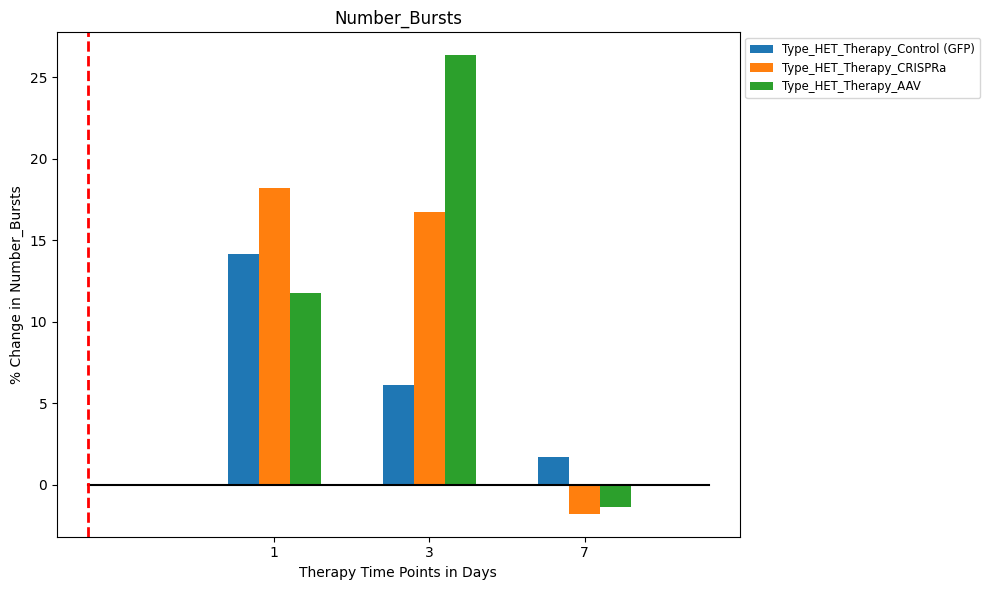

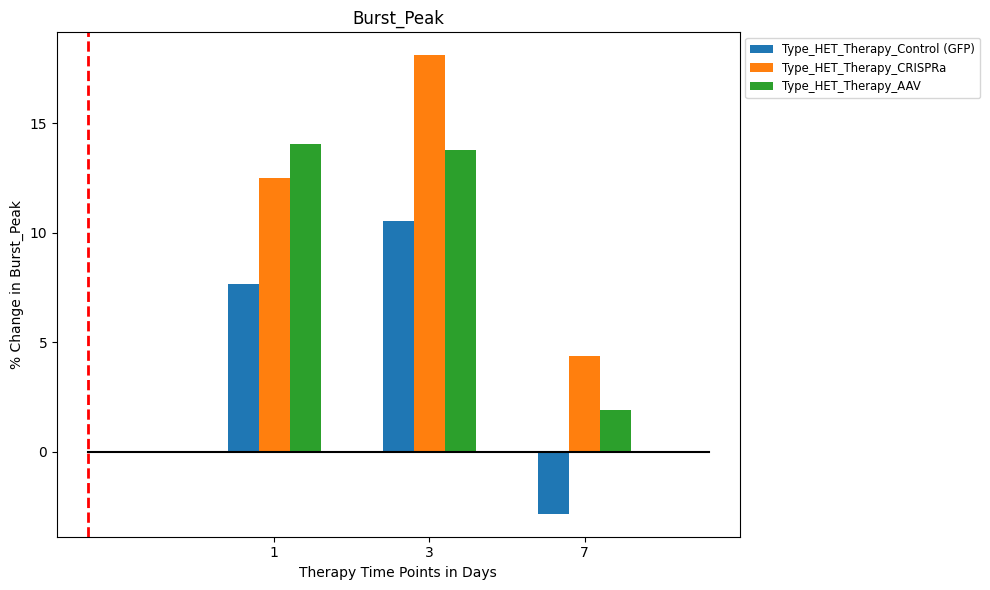

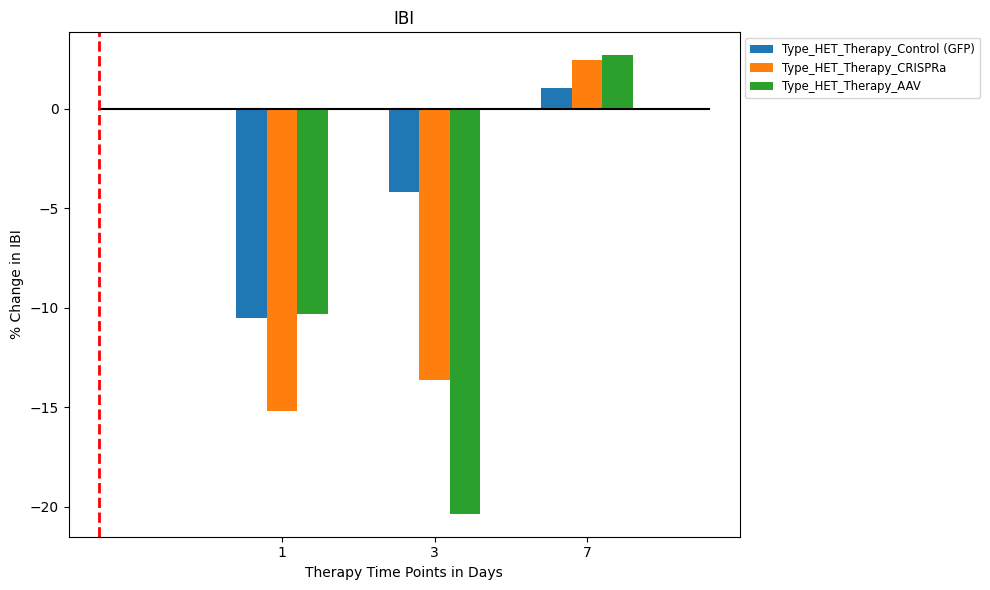

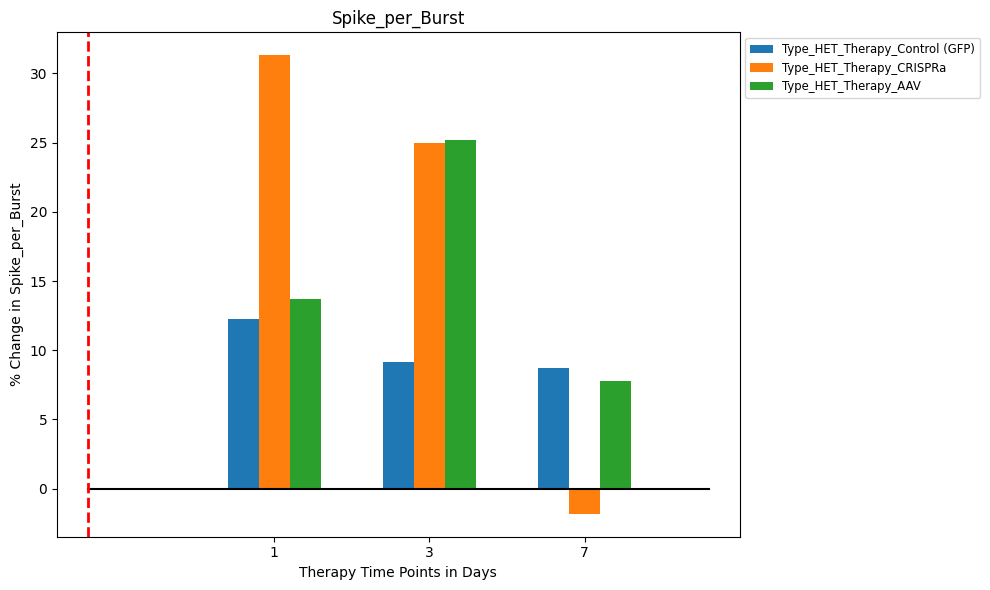

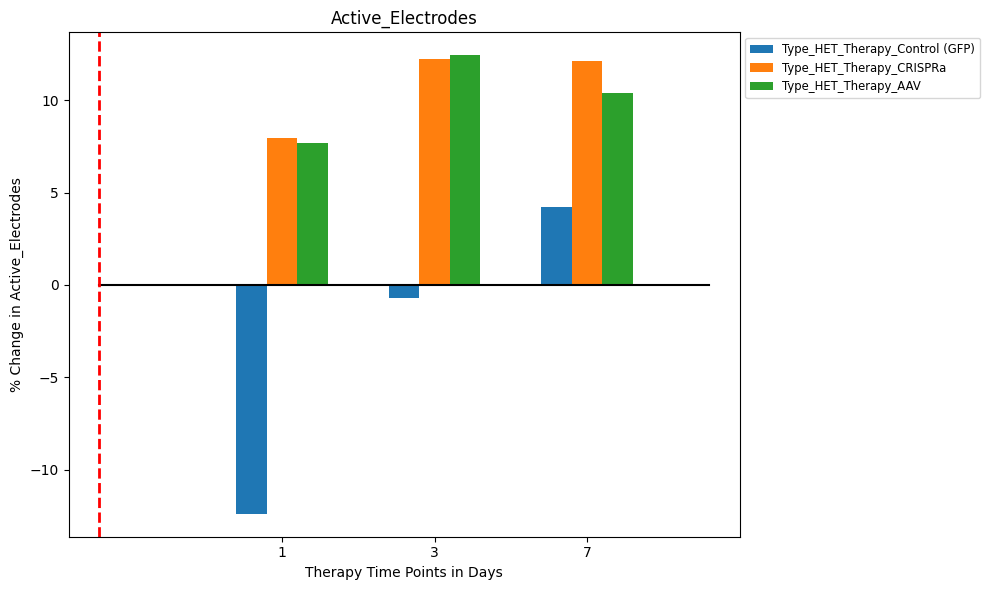

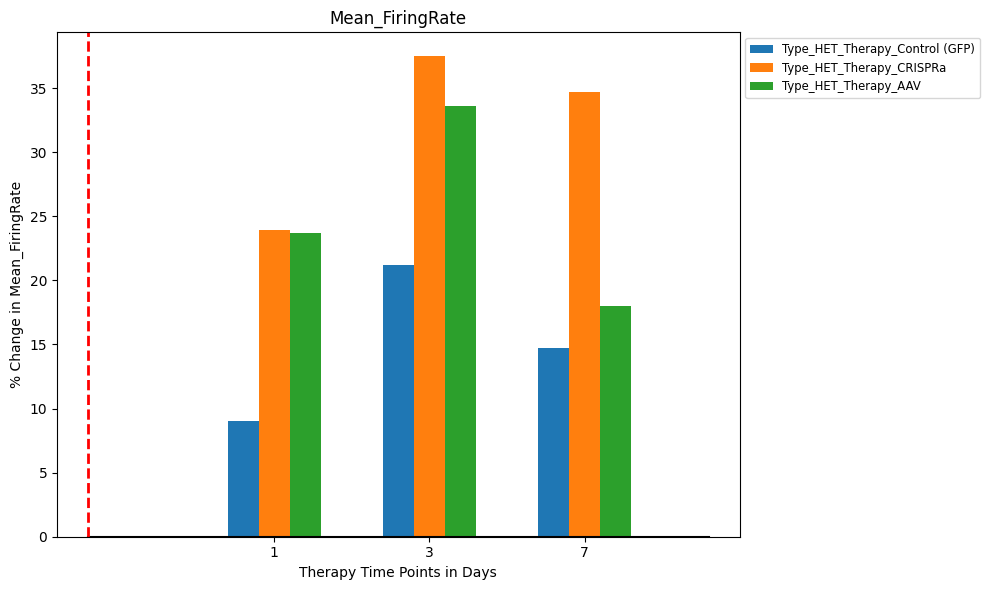

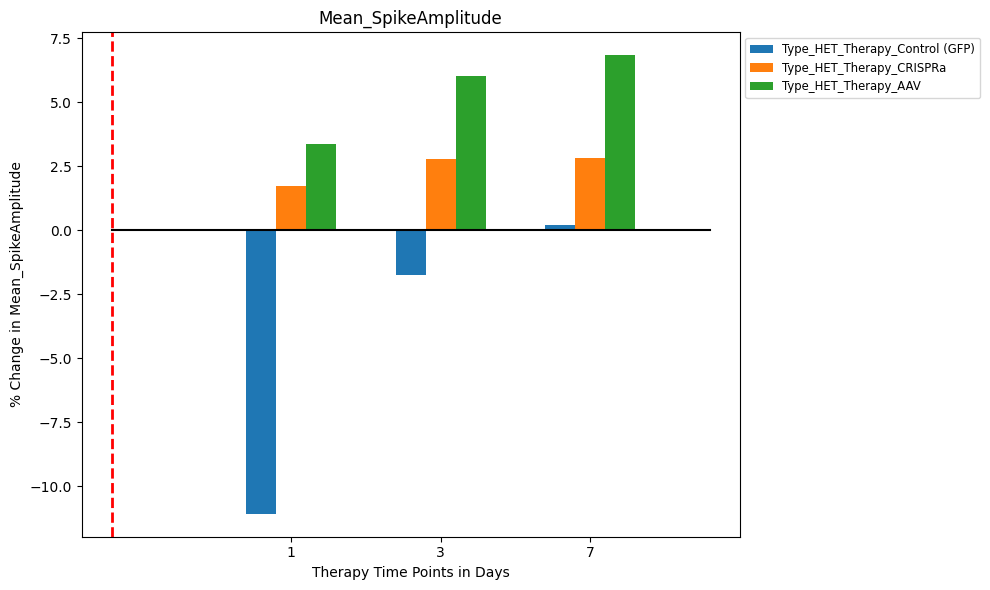

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example DataFrame loading step is skipped, ensure 'df' is properly initialized
output_types = ["Number_Bursts","Burst_Peak","IBI","Spike_per_Burst","Active_Electrodes","Mean_FiringRate","Mean_SpikeAmplitude"]

# Assuming 'df' is your DataFrame
for output_type in output_types:
    # Adjusting DataFrame columns as per your existing code setup


    # Assuming 'Percentage_Change' calculation is already handled as per your setup
    # Calculate the baseline (DIV==0) value for each Chip_Well_Therapy_Key
    baseline_values = df[df['DIV'] == 0].groupby('Chip_Well_Therapy_Key')[output_type].first().to_dict()

    # Function to calculate percentage change
    def calculate_percentage_change(row):
        baseline = baseline_values.get(row['Chip_Well_Therapy_Key'], np.nan)
        if pd.isna(baseline) or baseline == 0:
            return np.nan
        return (row[output_type] - baseline) / baseline * 100

    # Apply the percentage change calculation
    df['Percentage_Change'] = df.apply(calculate_percentage_change, axis=1)
    # Define subplot grid and figure size
    fig, axs = plt.subplots(1, 1, figsize=(10, 6))  # Sharing X-axis (DIV)

    # First subplot for line plots
    for combo in df['Chip_Well_Therapy_Key'].unique():
        combo_data = df[df['Chip_Well_Therapy_Key'] == combo]
        if combo_data.empty:
            continue
        key_for_color = f"{combo_data['Type'].iloc[0]}_{combo_data['Therapy_type'].iloc[0]}"
        color = color_map.get(key_for_color, 'grey')
        
        # Assuming 'jitter' function is defined; if not, replace or remove jitter application
        # jittered_DIV = jitter(combo_data['DIV'], jitter_strength=0.2)
        # For simplicity, let's skip jitter here as it's not defined in your snippet
        #axs[0].plot(combo_data['DIV'], combo_data['Percentage_Change'], label=f'{combo}',
          #          color=color, marker=marker_map.get(combo, 'o'), linestyle='-', linewidth=1, markersize=8)

    # Second subplot for bar plots
    color_list = ['#1f77b4',  # Muted blue
                '#ff7f0e',  # Safety orange
                '#2ca02c',  # Cooked asparagus green
                '#d62728',  # Brick red
                '#9467bd',  # Muted purple
                '#8c564b']  # Chestnut brown
    unique_divs = [ 1, 3, 7]
    legend_labels = set()
    for idx2, day in enumerate(unique_divs):
        for idx, cbd in enumerate([ 
       'Type_HET_Therapy_Control (GFP)','Type_HET_Therapy_CRISPRa', 'Type_HET_Therapy_AAV']):
            cbddata = df[(df['Type_Therapy_Key'] == cbd) & (df['DIV'] == day)]
            if not cbddata.empty:
                #print(day)
                label = cbd if cbd not in legend_labels else "_nolegend_"
                axs.bar((idx2+1) + (0.2 * idx), cbddata['Percentage_Change'].mean(), width=0.2,color =color_list[idx],label=label)
                legend_labels.add(cbd)
    
    x =np.linspace(0,len(unique_divs)+1,100)
    y = np.zeros_like(x)
    # Customize subplots
    axs.set_title(f'{output_type}')
    #axs[1].set_title(f'Bar Plot of Mean Percentage Change of {output_type} Across DIVs')
    plt.plot(x, y,color='black') 
    #for ax in axs:
    axs.set_xlabel('Therapy Time Points in Days')
    axs.set_ylabel(f'% Change in {output_type}')
    axs.axvline(x=0, color='r', linestyle='--', linewidth=2)
    axs.legend(bbox_to_anchor=(1.0, 1), loc='upper left', fontsize='small', ncol=1)

    # Adjusting the x-axis ticks to reflect DIV values
    axs.set_xticks([1.2,2.2 ,3.2])
    axs.set_xticklabels(unique_divs)
    plt.tight_layout()
    #plt.savefig(f'/home/mmp/Documents/ADNP_Therapy_Feb6plots/HET/{output_type}.png',dpi=300,format='png')

    plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Create a combined key for unique identification of each Chip_ID and Well
df['Chip_Well_Key'] = df['Chip_ID'] + '_Well_' + df['Well'].astype(str)

# Plotting
# Adjust the figure size as needed

# Get unique combinations of Chip_ID and Well
unique_combinations = df['Chip_Well_Key'].unique()
color_map = dict(zip(unique_genotypes, colors))
# Define a list of markers
markers = ['o', 's', '^', 'd', 'x', '+', '*', 'p', 'h', 'v', '<', '>', '|', '_']

# Ensure there are enough markers for each combination; if not, cycle through them
if len(df['Chip_Well_Key'].unique()) > len(markers):
    markers *= int(np.ceil(len(df['Chip_Well_Key'].unique()) / len(markers)))

# Assign a marker to each Chip_Well_Key
marker_map = dict(zip(df['Chip_Well_Key'].unique(), markers))

# unique_divs = df['DIV'].unique()
# div_to_index = {div: i for i, div in enumerate(unique_divs)}
# df['DIV_Index'] = df['DIV'].apply(lambda x: div_to_index[x])
# df['Jittered_DIV_Index'] = jitter(df['DIV_Index'], jitter_strength=0.1)




In [ ]:
def jitter(x, jitter_strength=0.1):
    return x + np.random.uniform(-jitter_strength, jitter_strength, size=np.shape(x))
output_type='Number_Bursts'
fig, ax = plt.subplots(figsize=(10, 6))  
# Iterate over each unique combination to plot
for combo in unique_combinations:
    combo_data = df[df['Chip_Well_Key'] == combo]
    type_color = color_map[combo_data['Type'].iloc[0]]
    
    ax.plot(jitter(combo_data['DIV']), combo_data[output_type], label=combo,color=type_color, marker=marker_map[combo], linestyle='-', linewidth=1, markersize=6)

# Customizing the plot
ax.set_xlabel('Days in Therapy', fontsize=12)
ax.set_ylabel(f'{output_type}', fontsize=12)
ax.set_title(f'{output_type} Across Different DIVs for All Chips and Wells', fontsize=14)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Move the legend outside the plot
ax.axvline(x=0, color='r', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

In [ ]:
# Create a combined key for unique identification of each Chip_ID and Well
df['Chip_Well_Key'] = df['Chip_ID'] + '_Well_' + df['Well'].astype(str)

# Plotting
# Adjust the figure size as needed

# Get unique combinations of Chip_ID and Well
unique_combinations = df['Chip_Well_Key'].unique()
color_map = dict(zip(unique_genotypes, colors))
# Define a list of markers
markers = ['o', 's', '^', 'd', 'x', '+', '*', 'p', 'h', 'v', '<', '>', '|', '_']

# Ensure there are enough markers for each combination; if not, cycle through them
if len(df['Chip_Well_Key'].unique()) > len(markers):
    markers *= int(np.ceil(len(df['Chip_Well_Key'].unique()) / len(markers)))

# Assign a marker to each Chip_Well_Key
marker_map = dict(zip(df['Chip_Well_Key'].unique(), markers))

# Determine the phase relative to DIV 0
df['Phase'] = np.where(df['DIV'] < 0, 'Before Therapy', 'After Therapy')

# Segment data by Type and calculate mean for each Chip_Well_Key and Phase
grouped_means = df.groupby(['Type', 'Chip_Well_Key', 'Phase'])[output_type].mean().reset_index()

# Calculate overall mean for each type before and after DIV 0
overall_means_by_type = grouped_means.groupby(['Type', 'Phase'])[output_type].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

types = df['Type'].unique()
#colors = plt.cm.tab10(np.linspace(0, 1, len(types)))  # Using tab10 colormap for distinct colors
colors=['cornflowerblue','indianred']
type_color_map = dict(zip(types, colors))

# Plot bars for the overall means for each type
bar_width = 0.35  # Adjust as necessary
phase_positions = {'Before Therapy': 1, 'After Therapy': 2}  # Positional offsets for bars

# Plotting overall means as bars
for type_name, color in type_color_map.items():
    for phase, position in phase_positions.items():
        mean_value = overall_means_by_type[(overall_means_by_type['Type'] == type_name) & (overall_means_by_type['Phase'] == phase)][output_type].values
        if mean_value.size > 0:
            ax.bar(position + bar_width * list(types).index(type_name), mean_value, bar_width, label=f'{type_name} ({phase})', color=color, alpha=0.75)

# Plot lines connecting the same Chip_Well_Key before and after DIV 0 for each type
for type_name in types:
    type_group = grouped_means[grouped_means['Type'] == type_name]
    for chip in type_group['Chip_Well_Key'].unique():
        chip_data = type_group[type_group['Chip_Well_Key'] == chip]
        if chip_data['Phase'].nunique() == 2:  # Ensure data exists for both phases
            before_mean = chip_data[chip_data['Phase'] == 'Before Therapy'][output_type].values[0]
            after_mean = chip_data[chip_data['Phase'] == 'After Therapy'][output_type].values[0]
            ax.plot([1 + bar_width * list(types).index(type_name), 2 + bar_width * list(types).index(type_name)], [before_mean, after_mean], marker=marker_map[chip], color=type_color_map[type_name])

# Customizing the plot
ax.set_xticks([1 + bar_width * (len(types)-1) / 2, 2 + bar_width * (len(types)-1) / 2])
ax.set_xticklabels(['Before Therapy', 'After Therapy'])
ax.set_ylabel(f'{output_type} (Mean)', fontsize=12)
ax.set_title(f'Mean {output_type} Before and After Therapy', fontsize=14)
ax.legend(loc='best', fontsize='small')

plt.tight_layout()
plt.show()

In [ ]:
pd.set_option('display.max_rows',500)
df

In [ ]:
dirpath = f'/home/mmp/Documents/ADNP_aftertherapy_23jan/'

output_types =['Number_Bursts','Burst_Peak','Spike_per_Burst','IBI','Active_Electrodes','Mean_FiringRate','Mean_SpikeAmplitude']
#,'Mean_FiringRate','Mean_SpikeAmplitude']
#output_types=['Active_Electrodes']

for therapy_type in unique_therapy_types:
    for output_type in output_types:
        total_genotypes = len(unique_genotypes)
        #output_type='Number_Bursts'
        # Print the number of unique genotypes
        print(f"Number of unique Genotypes: {total_genotypes}")

        # Initialize output arrays for each unique genotype
        output_arrays = {genotype: [] for genotype in unique_genotypes}
        chip_arrays = {genotype: [] for genotype in unique_genotypes}
        well_arrays = {genotype: [] for genotype in unique_genotypes}
        print(unique_genotypes)
        # Fill data from data frame
        for i in div:
            for genotype in unique_genotypes:
                temp_df = df.loc[(df['DIV'] == i) &
                                (df['Type'].str.strip() == genotype)&
                                (df['Therapy_type'] == therapy_type)
                                ]
                output_arrays[genotype].append(np.array(temp_df[output_type]))
                chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
                well_arrays[genotype].append(np.array(temp_df['Well']))

        #pdb.set_trace()
        w = len(div)/32  # bar width
        gaplength = 1/(len(unique_genotypes)+2)
        # Create x-coordinates of bars
        x_day = [d for d in div]
        x_genotype = {genotype: [] for genotype in unique_genotypes}
        x_d = list(range(0, len(div)))

        # Assign x-coordinates for each genotype
        for i, genotype in enumerate(unique_genotypes):
            for x in x_d:
                
                x_genotype[genotype].append(x + (gaplength*i+1))


        # Initialize plot
        fig, ax = plt.subplots()
        # Generate a list of distinct colors based on the number of genotypes
        #colors = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
        #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
        # marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
        # marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
        # Plot data for each genotype
        mean_data_all ={}
        yerr_data_all = {}
        n_data_all={}
        #breakpoint()
        #pdb.set_trace()
        for i,genotype in enumerate(unique_genotypes):
            #breakpoint()
            y_data = output_arrays[genotype]
            chipy_data = chip_arrays[genotype]
            welly_data = well_arrays[genotype]
            #print("type: ",type(genotype))
            # Calculate statistics
            mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
            yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
            n_data = [len(yi) for yi in y_data]
            # Store statistics in dictionaries
            mean_data_all[genotype] = mean_data
            yerr_data_all[genotype] = yerr_data
            n_data_all[genotype] = n_data
            # Save statistics to file
            output_file = f"intermediate_files/{output_type}_{genotype}_statistics.txt"
            with open(output_file, 'w') as file:
                file.write(f"{genotype} Statistics\n")
                file.write("Mean: " + ", ".join([str(m) for m in mean_data]) + "\n")
                file.write("SEM: " + ", ".join([str(sem) for sem in yerr_data]) + "\n")
                file.write("Sample Size (n): " + ", ".join([str(n_data)]) + "\n")
                
            # Plot bars
            #transparency value 
            alpha_value = 0.5
            ax.bar(x_genotype[genotype],
                height=mean_data,
                yerr=yerr_data,
                capsize=3,
                width=gaplength,
                color=colors[i],
                edgecolor='black',
                ecolor='black',
                alpha=alpha_value,label=genotype)
            #pdb.set_trace()
            # Plot scatter points
            #breakpoint()
            for j in range(len(x_genotype[genotype])):
                #pdb.set_trace()
                # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
        # Concatenate corresponding elements from chipy_data[j] and welly_data[j]
                combined_data = [chip + str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

                # # Check if the concatenated string is in track_chips, and set the marker accordingly
                # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
                # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

                # Use the marker in the scatter plot
                jitter_amount=0.07
                for k in range(len(y_data[j])):
                    #pdb.set_trace()
                    ax.scatter(
                        x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                        y_data[j][k],
                        s=7,
                        color=colors[i],
                        marker=markers[i]
                            )


        # # Calculate maximum y-value for plotting significance
        # max_y = max([max(data) for data in output_arrays.values() if data.size > 0])
        # increment = max_y * 0.1  # Increment to adjust y-position for significance markers

        #Perform and plot t-tests between all pairs of genotype
        #pdb.set_trace()
        for i in range(len(x_d)):
            #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
            maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
            count = 1
            p_values = []
            for j, genotype1 in enumerate(unique_genotypes):
                for k, genotype2 in enumerate(unique_genotypes):
                    if j < k:
                        #pdb.set_trace()
                        #print("mean_data_all",mean_data_all[genotype1])
                        #print("type:",type(genotype1))
                        mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                        mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                        #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                        sed = sqrt(sem1**2.0 + sem2**2.0)
                        t_stat = (mean1 - mean2) / sed
                        # degrees of freedom
                        degreef = n1+n2 - 2
                        alpha=0.05
                        # calculate the critical value
                        cv = stats.t.ppf(1.0 - alpha, degreef)
                        # calculate the p-vallue
                        p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                        p_values.append([mean1,sem1,mean2,sem2,p_value])

                        # Plot significance
                        #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                        x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                        
                        sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                        if not sign =='ns':
                            ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                            ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                            ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                            ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                        count = count +1

                        with open(output_file, 'a') as file:
                                    file.write(f"P values:{p_values} \n")


        # Axis scaling and labeling
        #xmin = 0
        #xmax = (max(df['DIV']) - xmin)*1.25
        #ymin = 0
        #ymax = (max(df[output_type]) - ymin)*1.4
        #pdb.set_trace()
        plt.title(f"{output_type} {therapy_type} " )
        plt.xlabel(f'Days in Therapy {therapy_type}')
        plt.ylabel(output_type)
        #plt.xticks(list(map(lambda x: x + 1+(2*gaplength), x_d)), x_day)
        print(x_day)
        plt.xlim(-0.1,10)
        plt.xticks(list(map(lambda x: x + 1, x_d)),x_day)
        #ax.set_xticks(x_ticks)

        # Set the corresponding DIV labels for each tick position
        #ax.set_xticklabels(div)
        #plt.axis([xmin, len(div) + 1, ymin, ymax])
        
        plt.legend(title='type',loc='upper right', fontsize='small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
        import os 
        
        if not os.path.exists(dirpath+{therapy_type}):
             os.makedirs(dirpath+{therapy})
        plt.savefig(f"{dirpath}/{output_type}.png",dpi=300,format='png')
        #ax.legend(labels = ['ADNP2 WT1','ADNP3 WT', 'ADNP2 HET1', 'ADNP3 HET'])

In [25]:
print(div)
div = [0,1,3,7]

[0, 1, 3, 7]


Number of unique Genotypes: 2
['WT' 'HET']
140
140
140
154.0
154.0
169.4
169.4
186.34
[0, 1, 3, 7]
Number of unique Genotypes: 2
['WT' 'HET']
9.21171985578061
9.21171985578061
9.21171985578061
10.13289184135867
10.13289184135867
10.13289184135867
11.146181025494538
[0, 1, 3, 7]
Number of unique Genotypes: 2
['WT' 'HET']
7422.36893203883
7422.36893203883
7422.36893203883
7422.36893203883
[0, 1, 3, 7]
Number of unique Genotypes: 2
['WT' 'HET']
3.45
3.45
3.45
3.7950000000000004
3.7950000000000004
4.1745
4.1745
4.59195
[0, 1, 3, 7]
Number of unique Genotypes: 2
['WT' 'HET']
77.02
77.02
77.02
77.02
[0, 1, 3, 7]
Number of unique Genotypes: 2
['WT' 'HET']
3.24334862385321
3.24334862385321
3.24334862385321
3.24334862385321
[0, 1, 3, 7]
Number of unique Genotypes: 2
['WT' 'HET']
66.8000036316796
66.8000036316796
66.8000036316796
73.48000399484756
73.48000399484756
73.48000399484756
[0, 1, 3, 7]
Number of unique Genotypes: 2
['WT' 'HET']
136
136
136
136
136
[0, 1, 3, 7]
Number of unique Genotype

/tmp/ipykernel_122578/3701741569.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


65.7180223264504
65.7180223264504
65.7180223264504
65.7180223264504
[0, 1, 3, 7]


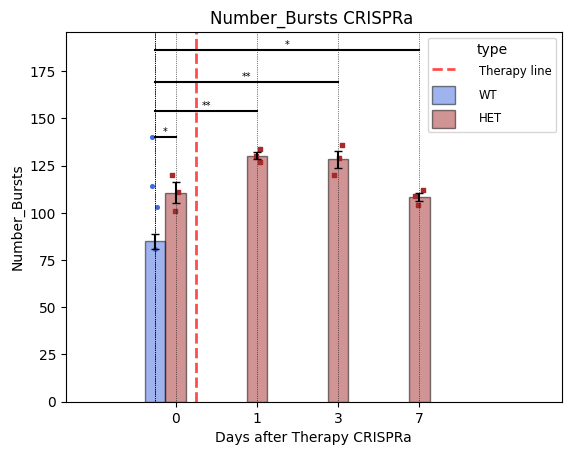

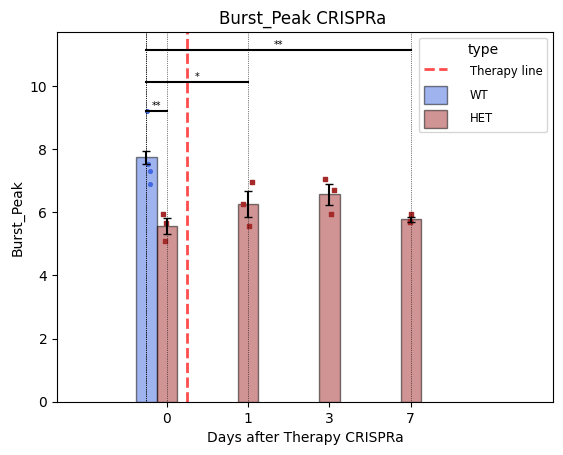

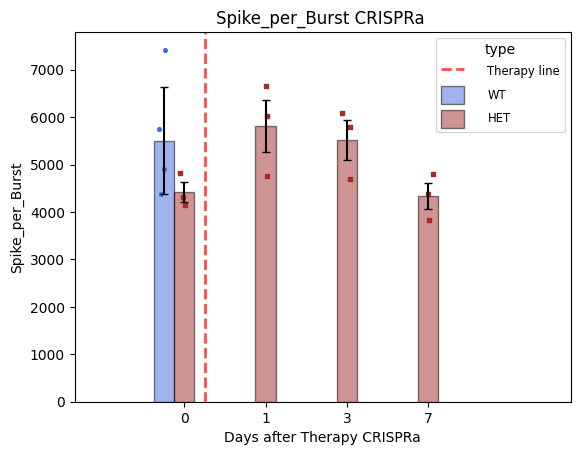

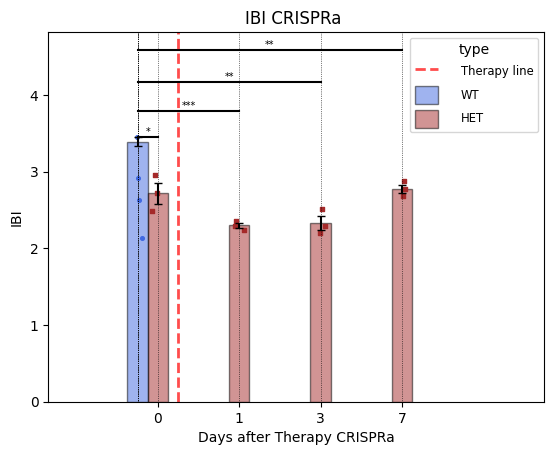

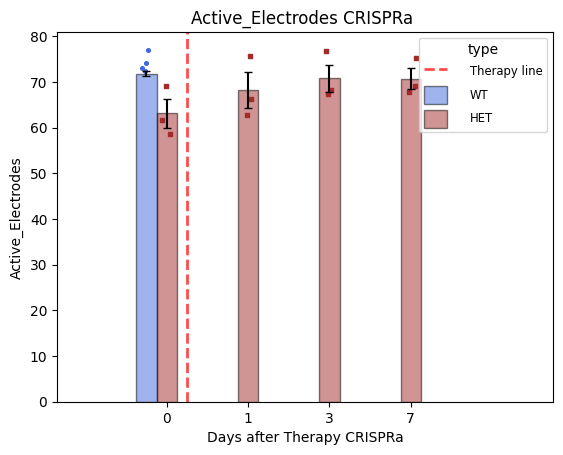

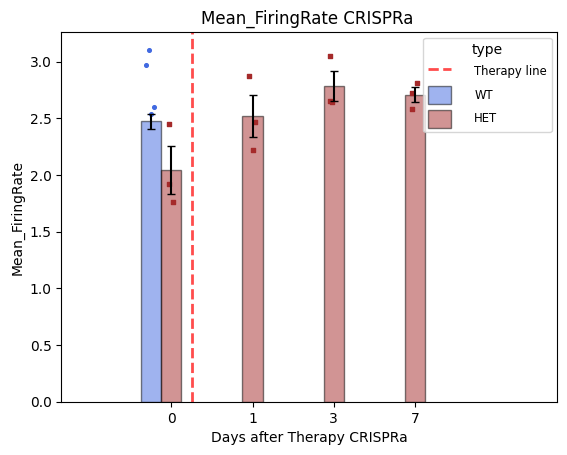

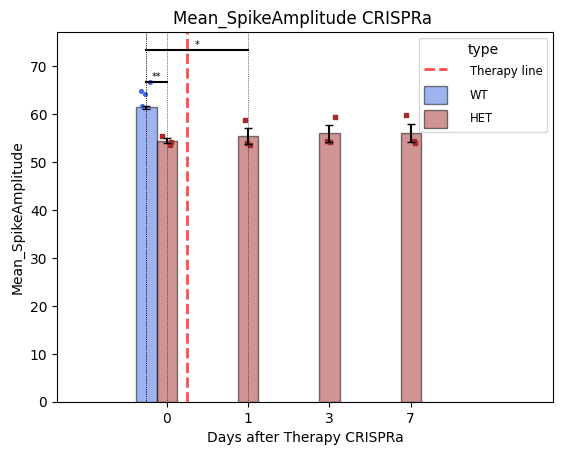

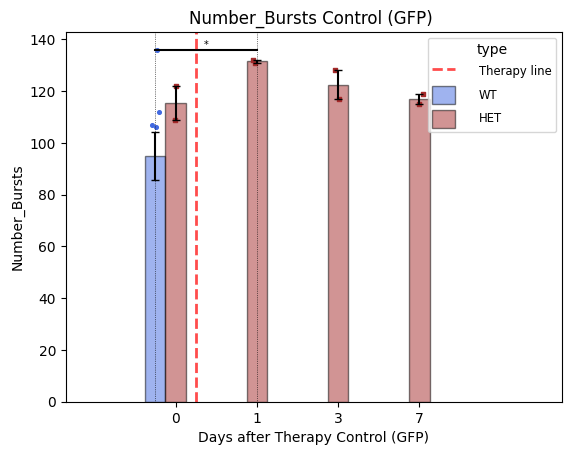

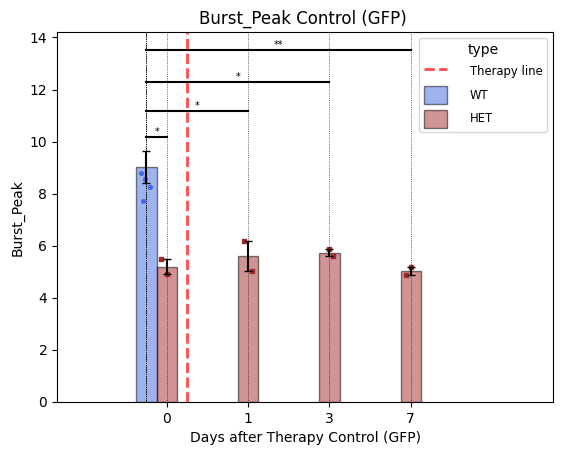

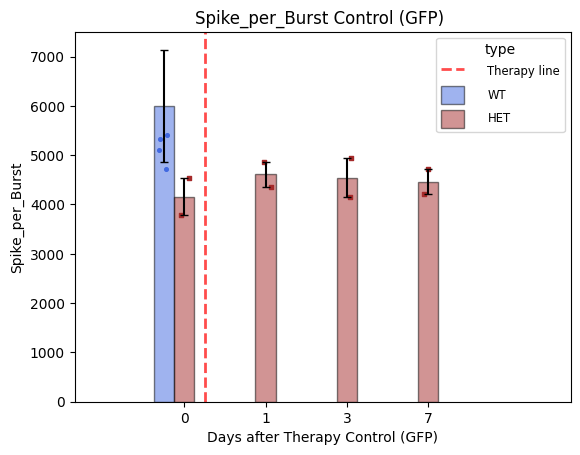

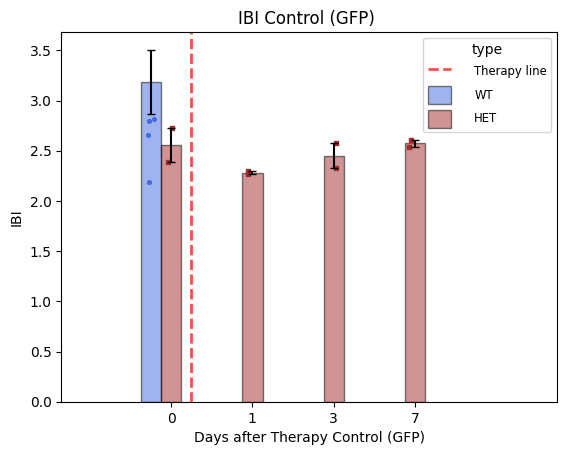

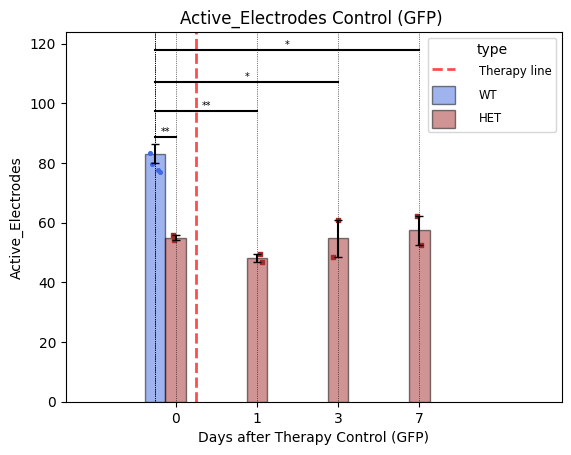

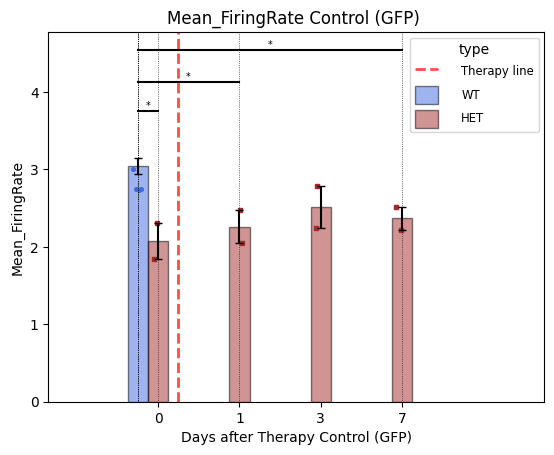

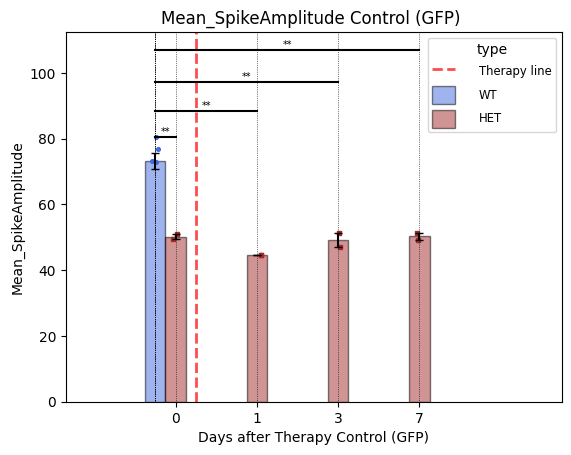

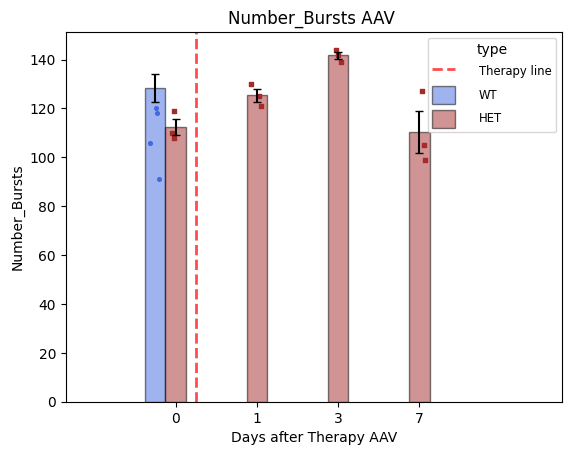

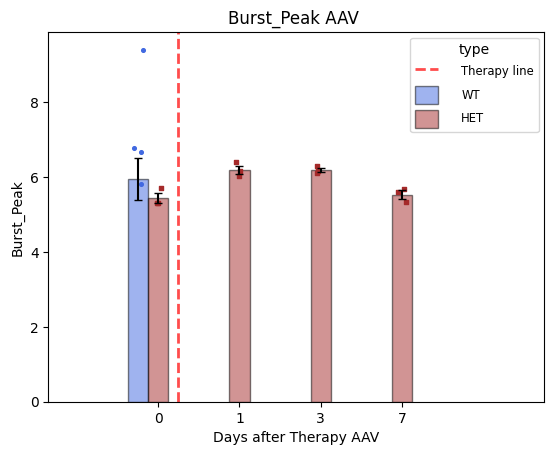

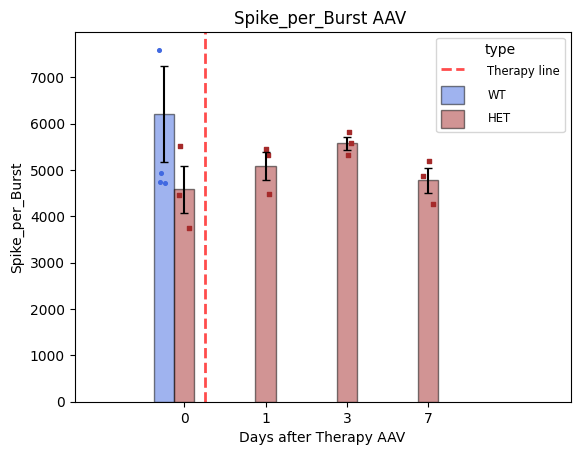

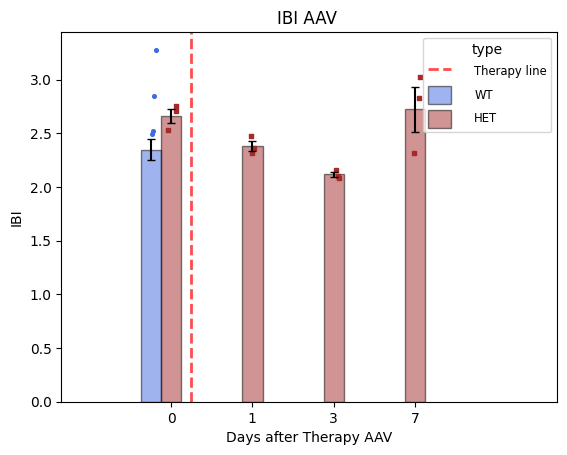

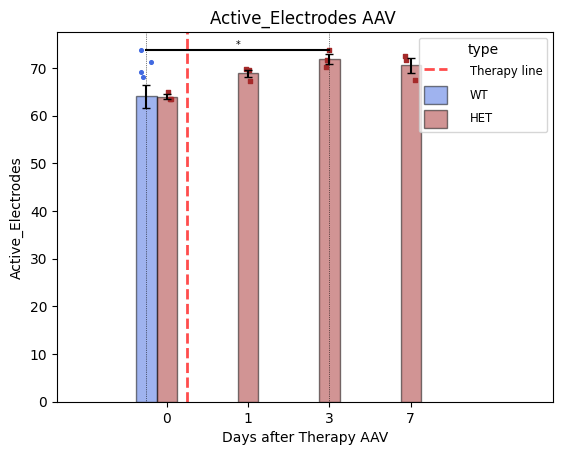

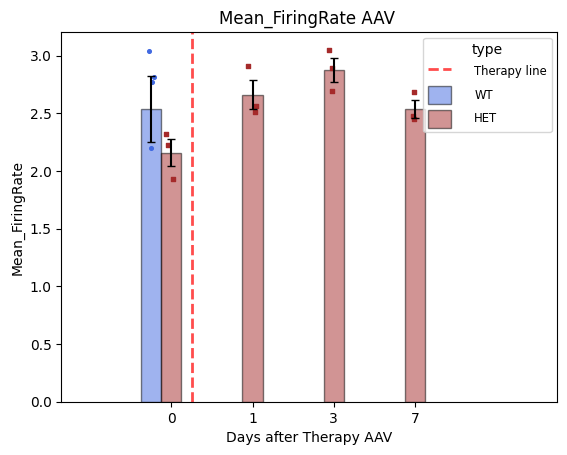

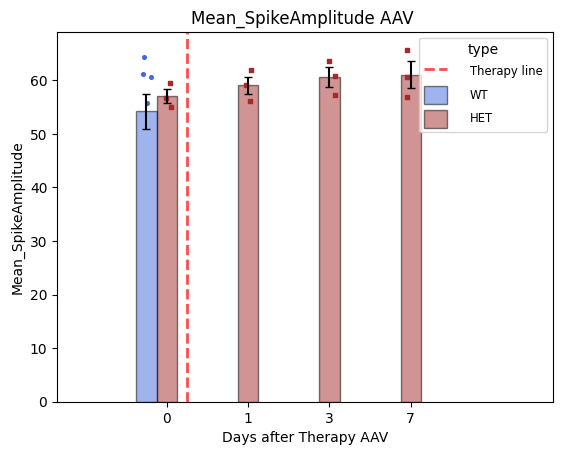

In [29]:
output_types =['Number_Bursts','Burst_Peak','Spike_per_Burst','IBI','Active_Electrodes','Mean_FiringRate','Mean_SpikeAmplitude']
#,'Mean_FiringRate','Mean_SpikeAmplitude']
#output_types=['Active_Electrodes']
for therapy_type in unique_therapy_types:
    for output_type in output_types:
        total_genotypes = len(unique_genotypes)
        #output_type='Number_Bursts'
        # Print the number of unique genotypes
        print(f"Number of unique Genotypes: {total_genotypes}")
         # Assuming 'Percentage_Change' calculation is already handled as per your setup
        # Calculate the baseline (DIV==0) value for each Chip_Well_Therapy_Key
        baseline_values = df[df['DIV'] == 0].groupby('Chip_Well_Therapy_Key')[output_type].first().to_dict()

        # Function to calculate percentage change
        def calculate_percentage_change(row):
            baseline = baseline_values.get(row['Chip_Well_Therapy_Key'], np.nan)
            if pd.isna(baseline) or baseline == 0:
                return np.nan
            return (row[output_type] - baseline) / baseline * 100

        # Apply the percentage change calculation
        df['Percentage_Change'] = df.apply(calculate_percentage_change, axis=1)
        # Initialize output arrays for each unique genotype
        output_arrays = {genotype: [] for genotype in unique_genotypes}
        chip_arrays = {genotype: [] for genotype in unique_genotypes}
        well_arrays = {genotype: [] for genotype in unique_genotypes}
        print(unique_genotypes)
        # Fill data from data frame
        for i in div:
            for genotype in unique_genotypes:
                temp_df = df.loc[(df['DIV'] == i) &
                                (df['Type'].str.strip() == genotype)&
                                (df['Therapy_type'] == therapy_type)
                                ]
                output_arrays[genotype].append(np.array(temp_df[output_type]))
                chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
                well_arrays[genotype].append(np.array(temp_df['Well']))

        #pdb.set_trace()
        w = len(div)/32  # bar width
        gaplength = 1/(len(unique_genotypes)+2)
        # Create x-coordinates of bars
        x_day = [d for d in div]
        x_genotype = {genotype: [] for genotype in unique_genotypes}
        x_d = list(range(0, len(div)))

        # Assign x-coordinates for each genotype
        for i, genotype in enumerate(unique_genotypes):
            for x in x_d:
                
                x_genotype[genotype].append(x + (gaplength*i+1))


        # Initialize plot
        fig, ax = plt.subplots()
        # Generate a list of distinct colors based on the number of genotypes
        #colors = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
        #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
        # marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
        # marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
        # Plot data for each genotype
        mean_data_all ={}
        yerr_data_all = {}
        n_data_all={}
        #breakpoint()
        #pdb.set_trace()
        for i,genotype in enumerate(unique_genotypes):
            #breakpoint()
            y_data = output_arrays[genotype]
            chipy_data = chip_arrays[genotype]
            welly_data = well_arrays[genotype]
            #print("type: ",type(genotype))
            # Calculate statistics
            mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
            yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
            n_data = [len(yi) for yi in y_data]
            # Store statistics in dictionaries
            mean_data_all[genotype] = mean_data
            yerr_data_all[genotype] = yerr_data
            n_data_all[genotype] = n_data
            # Save statistics to file
            output_file = f"intermediate_files/{output_type}_{genotype}_statistics.txt"
            with open(output_file, 'w') as file:
                file.write(f"{genotype} Statistics\n")
                file.write("Mean: " + ", ".join([str(m) for m in mean_data]) + "\n")
                file.write("SEM: " + ", ".join([str(sem) for sem in yerr_data]) + "\n")
                file.write("Sample Size (n): " + ", ".join([str(n_data)]) + "\n")
                
            # Plot bars
            #transparency value 
            alpha_value = 0.5
            if genotype =='WT':
                ax.bar(x_genotype[genotype][0],
                height=mean_data[0],
                yerr=yerr_data[0],
                capsize=3,
                width=gaplength,
                color=colors[i],
                edgecolor='black',
                ecolor='black',
                alpha=alpha_value,label=genotype)
            else:
                ax.bar(x_genotype[genotype],
                height=mean_data,
                yerr=yerr_data,
                capsize=3,
                width=gaplength,
                color=colors[i],
                edgecolor='black',
                ecolor='black',
                alpha=alpha_value,label=genotype)
            #pdb.set_trace()
            # Plot scatter points
            #breakpoint()
            for j in range(len(x_genotype[genotype])):
                #pdb.set_trace()
                # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
        # Concatenate corresponding elements from chipy_data[j] and welly_data[j]
                combined_data = [chip + str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

                # # Check if the concatenated string is in track_chips, and set the marker accordingly
                # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
                # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

                # Use the marker in the scatter plot
                jitter_amount=0.07
                if genotype == "WT":
                    ax.scatter(
                        x_genotype[genotype][0] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                        y_data[j][0],
                        s=7,
                        color=colors[i],
                        marker=markers[i]
                            )
                else:

                    for k in range(len(y_data[j])):
                    #pdb.set_trace()
                        ax.scatter(
                        x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                        y_data[j][k],
                        s=7,
                        color=colors[i],
                        marker=markers[i]
                            )


        # # Calculate maximum y-value for plotting significance
        # max_y = max([max(data) for data in output_arrays.values() if data.size > 0])
        # increment = max_y * 0.1  # Increment to adjust y-position for significance markers

        #Perform and plot t-tests between all pairs of genotype
        #pdb.set_trace()
        y_offset =0
        maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
        for i in range(len(x_d)):
            #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
            
            # Determine the range of the y-axis
            print(maxim)
            #y_min, y_max = ax.get_ylim()
            

            # Set the initial offset as a fraction of the y-axis range
            y_offset_fraction = 1  # Adjust this value as needed
            
            
            p_values = []
            genotype1="WT"
            genotype2="HET"
            mean1, sem1, n1 = mean_data_all[genotype1][0], yerr_data_all[genotype1][0], n_data_all[genotype1][0]
            mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
            sed = sqrt(sem1**2.0 + sem2**2.0)
            t_stat = (mean1 - mean2) / sed
            # degrees of freedom
            degreef = n1+n2 - 2
            alpha=0.05
            # calculate the critical value
            cv = stats.t.ppf(1.0 - alpha, degreef)
            # calculate the p-vallue
            p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
            p_values.append([mean1,sem1,mean2,sem2,p_value])

            # Plot significance
            #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
            x1, x2 = x_genotype[genotype1][0], x_genotype[genotype2][i]
            
            sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
            if not sign =='ns':
                y_position = maxim + y_offset
                print(y_position)
                ax.plot([x1, x2], [y_position] * 2, 'k', linewidth=1.5)
                ax.text((x1 + x2) / 2, y_position, sign, ha='center', va='bottom', fontsize=7)
                ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                maxim = y_position
                y_offset = maxim *0.1
            with open(output_file, 'a') as file:
                        file.write(f"P values:{p_values} \n")
        


        # Axis scaling and labeling
        #xmin = 0
        #xmax = (max(df['DIV']) - xmin)*1.25
        #ymin = 0
        #ymax = (max(df[output_type]) - ymin)*1.4
        #pdb.set_trace()
        ax.axvline(x=1.5, color='r', linestyle='--', linewidth=2, alpha=0.7, label='Therapy line')
          
        plt.title(f"{output_type} {therapy_type} " )
        plt.xlabel(f'Days after Therapy {therapy_type}')
        plt.ylabel(output_type)
        #plt.xticks(list(map(lambda x: x + 1+(2*gaplength), x_d)), x_day)
        print(x_day)
        plt.xlim(-0.1,len(div)+2)
        plt.xticks(list(map(lambda x: x + 1.25, x_d)),x_day)
        #ax.set_xticks(x_ticks)

        # Set the corresponding DIV labels for each tick position
        #ax.set_xticklabels(div)
        #plt.axis([xmin, len(div) + 1, ymin, ymax])
        
        plt.legend(title='type',loc='upper right', fontsize='small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
        import os 
        dirpath = f'/home/mmp/Documents/ADNP_aftertherapy_21feb/{therapy_type}'
        if not os.path.exists(dirpath):
             os.makedirs(dirpath)
        plt.savefig(f"{dirpath}/{output_type}.svg",dpi=300,format='svg')
        #ax.legend(labels = ['ADNP2 WT1','ADNP3 WT', 'ADNP2 HET1', 'ADNP3 HET'])

In [ ]:
df

## Organoid single neuron Type

[1, 2, 3]
[45.416666666666664, 37.666666666666664, 39.333333333333336]
1
[1, 2, 3]
[2.4675499916808517, 3.5558655852080636, 4.054735654057863]
1
[1, 2, 3]
[1726.1389293863242, 1838.8444731542857, 1758.3062895576986]
1
[1, 2, 3]
[9.532885020436384, 10.555005552851227, 9.102141994424063]
1
[1, 2, 3]
[1.1491774844517588, 1.1480725930222484, 1.1472755764521168]
1


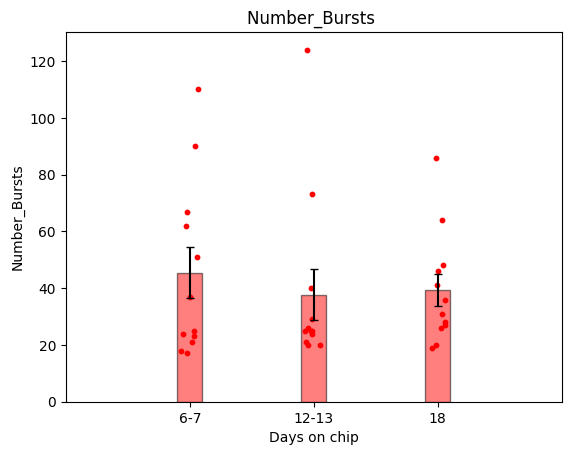

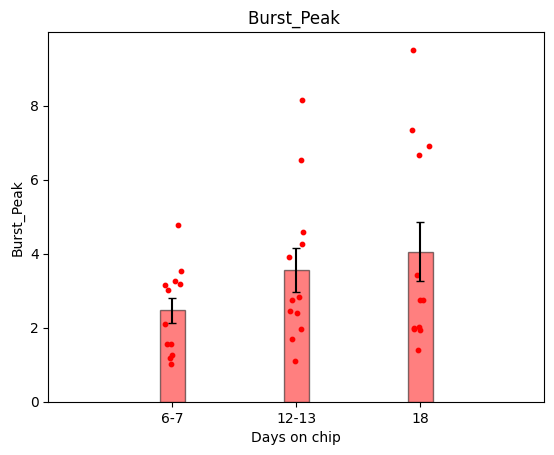

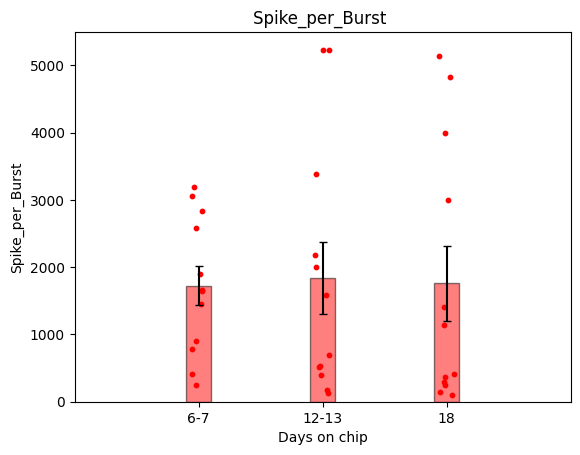

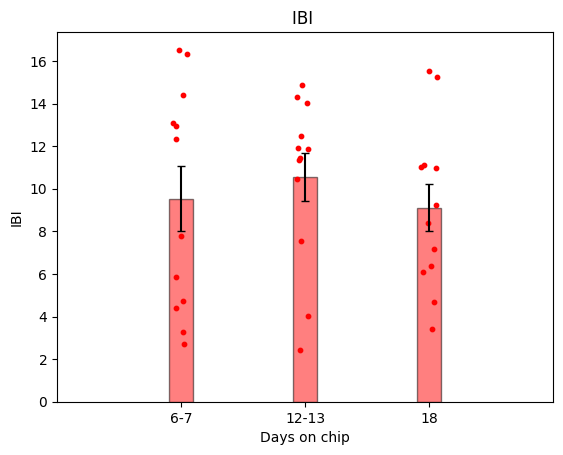

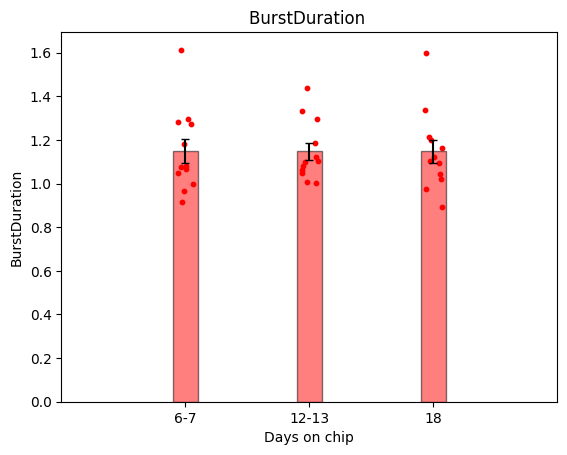

In [7]:
output_types =['Number_Bursts','Burst_Peak','Spike_per_Burst','IBI','BurstDuration']
#,'Mean_FiringRate','Mean_SpikeAmplitude']
#output_types=['Active_Electrodes']
genotype = "RETT"
for output_type in output_types:
    #total_genotypes = len(unique_genotypes)
    #output_type='Number_Bursts'
    # Print the number of unique genotypes
    #print(f"Number of unique Genotypes: {total_genotypes}")

    # Initialize output arrays for each unique genotype
    output_arrays = {genotype: [] }
    chip_arrays = {genotype: [] }
    well_arrays = {genotype: [] }
    #print(unique_genotypes)
    # Fill data from data frame
    for i in div:

        temp_df = df.loc[(df['DIV'] == i) &
                        (df['NeuronType'].str.strip() == genotype)
                        ]
        output_arrays[genotype].append(np.array(temp_df[output_type]))
        chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
        well_arrays[genotype].append(np.array(temp_df['Well']))

    #pdb.set_trace()

    # Create x-coordinates of bars
    x_day = list(range(1,len(div)+1))
  




    # Initialize plot
    fig, ax = plt.subplots()
    # Generate a list of distinct colors based on the number of genotypes
    #colors = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
    #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
    # marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
    # marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
    # Plot data for each genotype
    mean_data_all ={}
    yerr_data_all = {}
    n_data_all={}
    #breakpoint()
    #pdb.set_trace()
    
        #breakpoint()
    y_data = output_arrays[genotype]
    chipy_data = chip_arrays[genotype]
    welly_data = well_arrays[genotype]
    #print("type: ",type(genotype))
    # Calculate statistics
    mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
    yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
    n_data = [len(yi) for yi in y_data]
    # Store statistics in dictionaries
    mean_data_all[genotype] = mean_data
    yerr_data_all[genotype] = yerr_data
    n_data_all[genotype] = n_data
    # # Save statistics to file
    # output_file = f"intermediate_files/{output_type}_{genotype}_statistics.txt"
    # with open(output_file, 'w') as file:
    #     file.write(f"{genotype} Statistics\n")
    #     file.write("Mean: " + ", ".join([str(m) for m in mean_data]) + "\n")
    #     file.write("SEM: " + ", ".join([str(sem) for sem in yerr_data]) + "\n")
    #     file.write("Sample Size (n): " + ", ".join([str(n_data)]) + "\n")
        
    # Plot bars
    #transparency value 
    alpha_value = 0.5
    print(x_day)
    print(mean_data)
    ax.bar(x_day,
    height=mean_data,
    yerr=yerr_data,
    capsize=3,
    width=0.2,
    color='red',
    edgecolor='black',
    ecolor='black',
    alpha=alpha_value,label=genotype)
    #pdb.set_trace()
    # Plot scatter points
    #breakpoint()
    print(x_day[0])
    for j in range(len(x_day)):
        #pdb.set_trace()
        # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
# Concatenate corresponding elements from chipy_data[j] and welly_data[j]
        combined_data = [str(chip) + str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

        # # Check if the concatenated string is in track_chips, and set the marker accordingly
        # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
        # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

        # Use the marker in the scatter plot
        jitter_amount=0.07
    
        ax.scatter(
            x_day[j] + np.random.uniform(-jitter_amount, jitter_amount, len(y_data[j])),
            y_data[j],
            s=10,
            color='red',
            marker='o'
                )
    


        
    plt.title(f"{output_type} " )
    plt.xlabel(f'Days on chip')
    plt.ylabel(output_type)
    #plt.xticks(list(map(lambda x: x + 1+(2*gaplength), x_d)), x_day)
    
    plt.xlim(0,len(div)+1)
    plt.xticks(x_day,div)
    #ax.set_xticks(x_ticks)

    # Set the corresponding DIV labels for each tick position
    #ax.set_xticklabels(div)
    #plt.axis([xmin, len(div) + 1, ymin, ymax])
    
    #plt.legend(title='type',loc='upper right', fontsize='small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
        # import os 
        # dirpath = f'/home/mmp/Documents/ADNP_aftertherapy_23jan/{therapy_type}'
        # if not os.path.exists(dirpath):
        #      os.makedirs(dirpath)
        # plt.savefig(f"{dirpath}/{output_type}.png",dpi=300,format='png')
        # #ax.legend(labels = ['ADNP2 WT1','ADNP3 WT', 'ADNP2 HET1', 'ADNP3 HET'])

In [14]:
data_df.columns

Index(['Run_ID', 'DIV', 'Well', 'NeuronType', 'Time', 'Chip_ID', 'IBI',
       'Burst_Peak', 'Number_Bursts', 'Spike_per_Burst', 'BurstDuration',
       'Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_Area'],
      dtype='object')

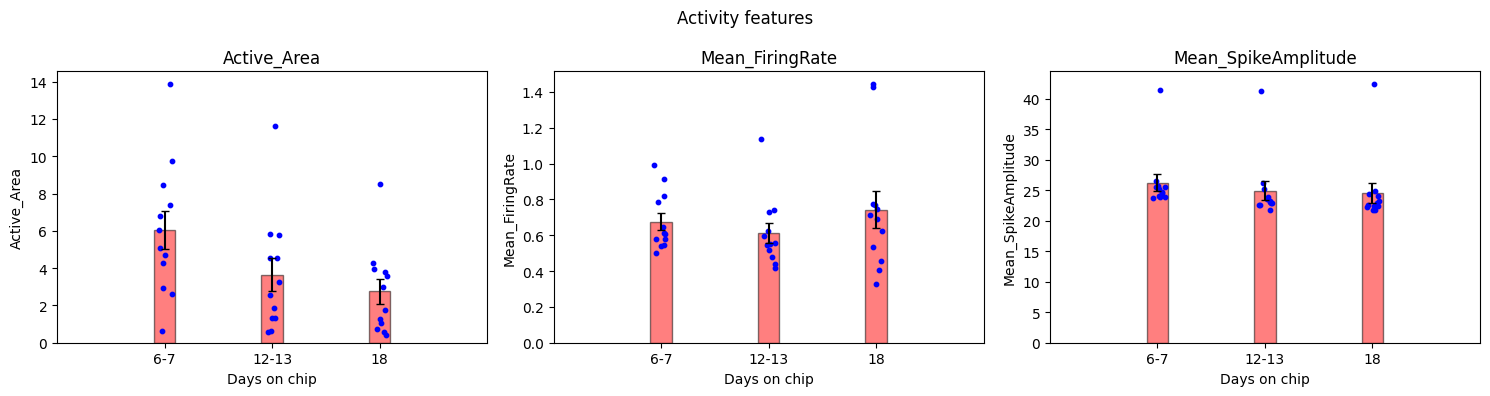

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
figtitle = "Activity features"
# Assuming df, div, and other necessary data are already defined

#output_types = ['Number_Bursts', 'Burst_Peak', 'Spike_per_Burst', 'IBI', 'BurstDuration']
activity_output_types = ['Active_Area','Mean_FiringRate','Mean_SpikeAmplitude']
genotype = "RETT"

# Create a figure and a set of subplots with 3 rows and 2 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 4)) # Adjust figsize as needed
axs = axs.flatten() # Flatten the 2D array of axes to 1D for easier indexing

# Use this to keep track of the current subplot index
subplot_idx = 0

for output_type in activity_output_types:
    ax = axs[subplot_idx] # Get current Axes instance
    output_arrays = {genotype: []}
    chip_arrays = {genotype: []}
    well_arrays = {genotype: []}

    for i in div:
        temp_df = df.loc[(df['DIV'] == i) & (df['NeuronType'].str.strip() == genotype)]
        output_arrays[genotype].append(np.array(temp_df[output_type]))
        chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
        well_arrays[genotype].append(np.array(temp_df['Well']))

    x_day = list(range(1, len(div) + 1))

    y_data = output_arrays[genotype]
    chipy_data = chip_arrays[genotype]
    welly_data = well_arrays[genotype]

    # Calculate statistics
    mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
    yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1) / np.sqrt(np.size(yi)) for yi in y_data]

    # Plotting
    alpha_value = 0.5
    ax.bar(x_day, height=mean_data, yerr=yerr_data, capsize=3, width=0.2, color='red', edgecolor='black', ecolor='black', alpha=alpha_value, label=genotype)

    # Plot scatter points with jitter
    jitter_amount = 0.07
    for j in range(len(x_day)):
        ax.scatter(x_day[j] + np.random.uniform(-jitter_amount, jitter_amount, len(y_data[j])), y_data[j], s=10, color='blue', marker='o')

    # Set titles and labels
    ax.set_title(f"{output_type}")
    ax.set_xlabel('Days on chip')
    ax.set_ylabel(output_type)
    ax.set_xlim(0, len(div) + 1)
    ax.set_xticks(x_day)
    ax.set_xticklabels(div)

    subplot_idx += 1 # Move to the next subplot index

# Hide the last subplot if the total number of plots is odd
# if len(activity_output_types) % 2 != 0:
#     fig.delaxes(axs[-1]) # This removes the last subplot
plt.suptitle(figtitle)
plt.tight_layout()
plt.savefig("/home/mmp/Documents/PharmacologyRETT/activityfeatures.png",dpi=300,format='png')
plt.show()


# WT and HET genotype comparisons

In [24]:
# Assuming 'df' is your DataFrame containing the data

# Create a combined key for unique identification of each Chip_ID and Well
df['Chip_Well_Key'] = df['Chip_ID'] + '_Well_' + df['Well'].astype(str)

# Plotting
# Adjust the figure size as needed

# Get unique combinations of Chip_ID and Well
unique_combinations = df['Chip_Well_Key'].unique()
color_map = dict(zip(unique_genotypes, colors))
# Define a list of markers
markers = ['o', 's', '^', 'd', 'x', '+', '*', 'p', 'h', 'v', '<', '>', '|', '_']

# Ensure there are enough markers for each combination; if not, cycle through them
if len(df['Chip_Well_Key'].unique()) > len(markers):
    markers *= int(np.ceil(len(df['Chip_Well_Key'].unique()) / len(markers)))

# Assign a marker to each Chip_Well_Key
marker_map = dict(zip(df['Chip_Well_Key'].unique(), markers))

In [14]:
div = data_df['DIV'].unique()
unique_genotypes = data_df['Combined_Genotype'].unique()

In [15]:
unique_genotypes

array(['802F', 'RTT'], dtype=object)

In [21]:
colors = ['lightblue','crimson']
markers=['s','o']

In [13]:
# Assuming 'df' is your DataFrame containing the data
import re
# Create a new column 'Combined_Genotype' to group genotypes
 #Replace values starting with 'RTT' with 'RTT'
data_df['Combined_Genotype'] = data_df['NeuronType'].str.replace(r'^RTT.*', 'RTT', regex=True)

# Then, replace values starting with '802F' (case insensitive) with '802F'
data_df['Combined_Genotype'] = data_df['Combined_Genotype'].str.replace(r'^802F.*', '802F', regex=True, flags=re.IGNORECASE)
data_df['Combined_Genotype'] 

# Now you can use the 'Combined_Genotype' column for further analysis or plotting


0     802F
1      RTT
2     802F
3      RTT
4     802F
5     802F
6      RTT
7      RTT
8     802F
9      RTT
10    802F
11     RTT
12    802F
13     RTT
14    802F
15    802F
16     RTT
17     RTT
18    802F
19     RTT
20    802F
21     RTT
22    802F
23     RTT
24    802F
25    802F
26     RTT
27     RTT
28    802F
29     RTT
Name: Combined_Genotype, dtype: object

In [16]:
df=data_df.copy()
df.columns

Index(['Run_ID', 'DIV', 'Well', 'NeuronType', 'Time', 'Chip_ID', 'IBI',
       'Burst_Peak', 'Number_Bursts', 'Spike_per_Burst', 'BurstDuration',
       'Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area',
       'Combined_Genotype'],
      dtype='object')

Number of unique Genotypes: 2
['802F' 'RTT']
Number of unique Genotypes: 2
['802F' 'RTT']
Number of unique Genotypes: 2
['802F' 'RTT']
Number of unique Genotypes: 2
['802F' 'RTT']
Number of unique Genotypes: 2
['802F' 'RTT']
Number of unique Genotypes: 2
['802F' 'RTT']
Number of unique Genotypes: 2
['802F' 'RTT']


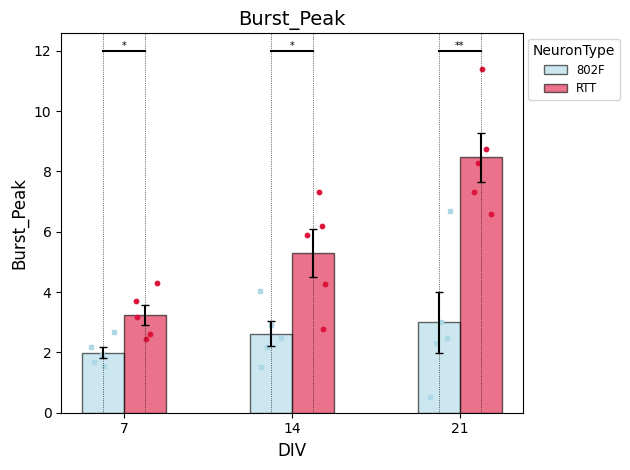

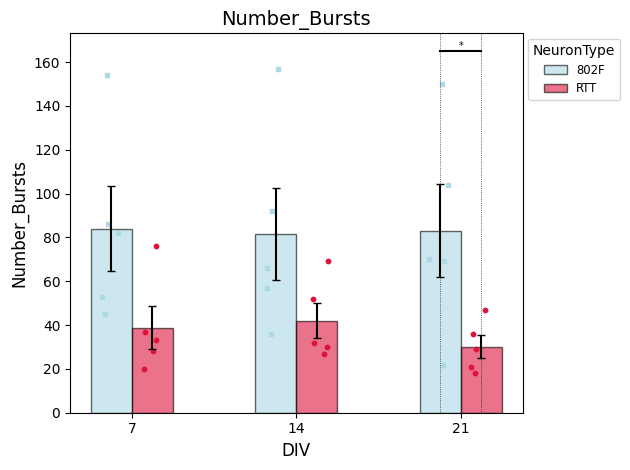

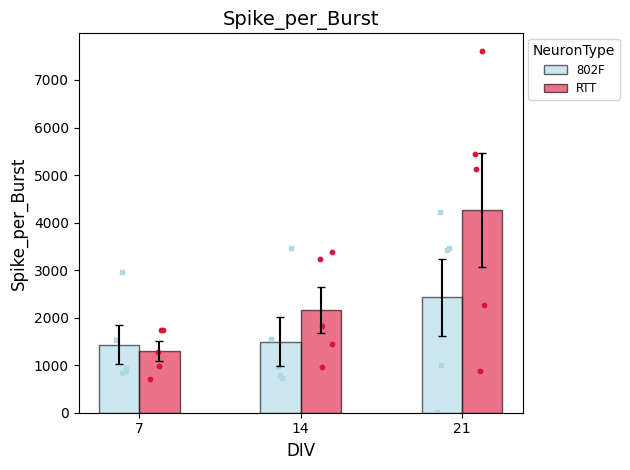

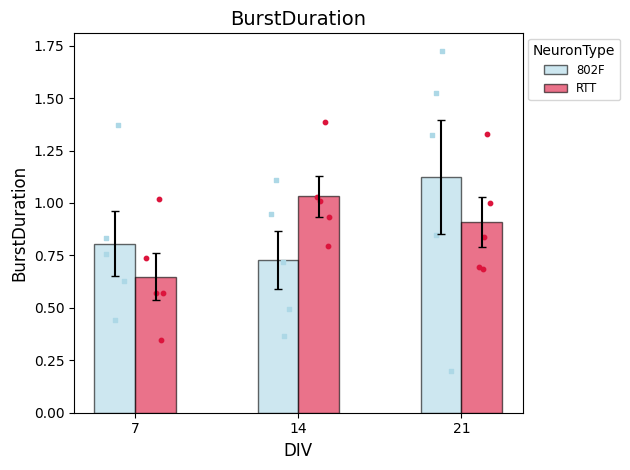

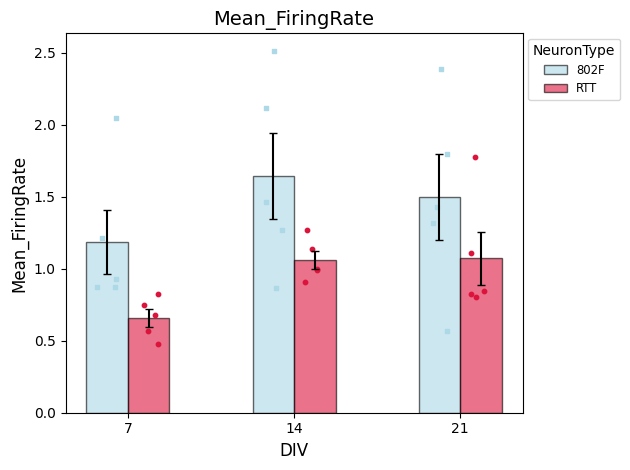

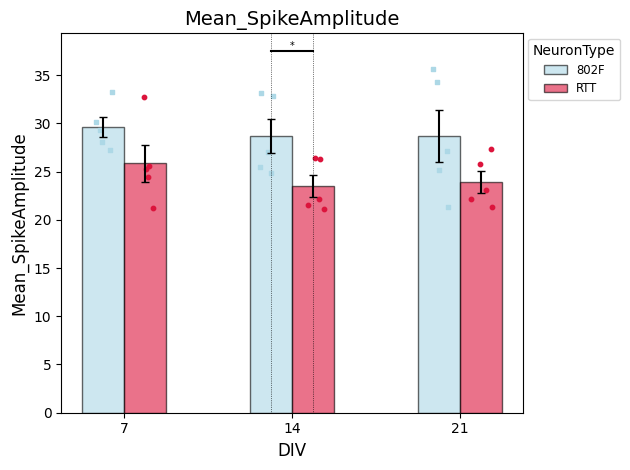

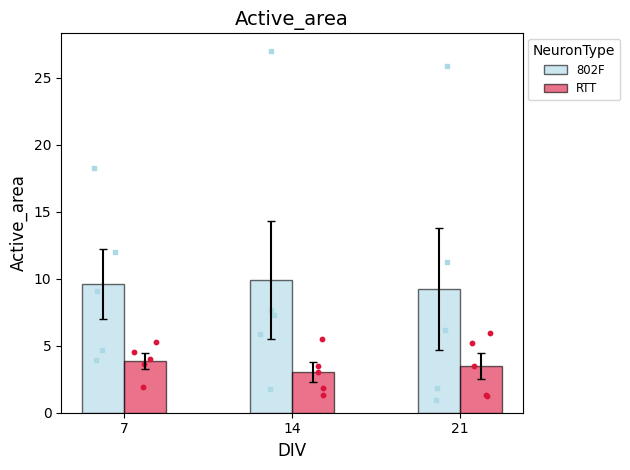

In [24]:
output_types =['Burst_Peak', 'Number_Bursts', 'Spike_per_Burst', 'BurstDuration',
       'Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area']
dirpath = f'/home/mmp/Documents/organoidKMB/'
for output_type in output_types:
    total_genotypes = len(unique_genotypes)
    #output_type='Number_Bursts'
    # Print the number of unique genotypes
    print(f"Number of unique Genotypes: {total_genotypes}")

    # Initialize output arrays for each unique genotype
    output_arrays = {genotype: [] for genotype in unique_genotypes}
    chip_arrays = {genotype: [] for genotype in unique_genotypes}
    well_arrays = {genotype: [] for genotype in unique_genotypes}
    print(unique_genotypes)
    # Fill data from data frame
    for i in div:
        for genotype in unique_genotypes:
            temp_df = df.loc[(df['DIV'] == i) &
                            (df['Combined_Genotype'].str.strip() == genotype)
                            ]
            output_arrays[genotype].append(np.array(temp_df[output_type]))
            chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
            well_arrays[genotype].append(np.array(temp_df['Well']))
    #print(df)
    # Adjust bar width and gap between them
    bar_width = 0.25  # Adjust as necessary for your specific plot
    gap_between_bars = 0  # Adjust the gap between bars within a group

    # Calculate the total width for all bars in a group
    total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

    # Create x-coordinates of bars for each genotype group
    x_genotype = {genotype: [] for genotype in unique_genotypes}
    base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
    offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
    centered_x = base_x_coordinate - offset + bar_width / 2
    for i, genotype in enumerate(unique_genotypes):
        x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)



    # Initialize plot
    fig, ax = plt.subplots()
    # Generate a list of distinct colors based on the number of genotypes
    #colors = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
    #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
    # marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
    # marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
    # Plot data for each genotype
    mean_data_all ={}
    yerr_data_all = {}
    n_data_all={}
    #breakpoint()
    #pdb.set_trace()
    for i,genotype in enumerate(unique_genotypes):
        #breakpoint()
        y_data = output_arrays[genotype]
        chipy_data = chip_arrays[genotype]
        welly_data = well_arrays[genotype]
        #print("type: ",type(genotype))
        # Calculate statistics
        mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
        yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
        n_data = [len(yi) for yi in y_data]
        # Store statistics in dictionaries
        mean_data_all[genotype] = mean_data
        yerr_data_all[genotype] = yerr_data
        n_data_all[genotype] = n_data
        # Save statistics to file
        output_file = f"intermediate_files/{output_type}_{genotype}_statistics.txt"
        with open(output_file, 'w') as file:
            file.write(f"{genotype} Statistics\n")
            file.write("Mean: " + ", ".join([str(m) for m in mean_data]) + "\n")
            file.write("SEM: " + ", ".join([str(sem) for sem in yerr_data]) + "\n")
            file.write("Sample Size (n): " + ", ".join([str(n_data)]) + "\n")
            
        # Plot bars
        #transparency value 
        alpha_value = 0.5
        ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor='black', ecolor='black', label=genotype,alpha=0.6)

        #pdb.set_trace()
        # Plot scatter points
        #breakpoint()
        for j in range(len(x_genotype[genotype])):
            #pdb.set_trace()
            # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
    # Concatenate corresponding elements from chipy_data[j] and welly_data[j]
            combined_data = [str(chip)+ str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

            # # Check if the concatenated string is in track_chips, and set the marker accordingly
            # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
            # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

            # Use the marker in the scatter plot
            jitter_amount=0.07
            for k in range(len(y_data[j])):
                #pdb.set_trace()
                ax.scatter(
                    x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                    y_data[j][k],
                    s=10,
                    color=colors[i],
                    marker=markers[i]
                        )


    # # Calculate maximum y-value for plotting significance
    # max_y = max([max(data) for data in output_arrays.values() if data.size > 0])
    # increment = max_y * 0.1  # Increment to adjust y-position for significance markers

    #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
    for i in range(len(base_x_coordinate)):
        #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
        maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
        count = 1
        p_values = []
        for j, genotype1 in enumerate(unique_genotypes):
            for k, genotype2 in enumerate(unique_genotypes):
                if j < k:
                    #pdb.set_trace()
                    #print("mean_data_all",mean_data_all[genotype1])
                    #print("type:",type(genotype1))
                    mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                    mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                    #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                    sed = sqrt(sem1**2.0 + sem2**2.0)
                    t_stat = (mean1 - mean2) / sed
                    # degrees of freedom
                    degreef = n1+n2 - 2
                    alpha=0.05
                    # calculate the critical value
                    cv = stats.t.ppf(1.0 - alpha, degreef)
                    # calculate the p-vallue
                    p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                    p_values.append([mean1,sem1,mean2,sem2,p_value])

                    # Plot significance
                    #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                    x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                    
                    sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                    if not sign =='ns':
                        ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                        ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                        ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                        ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                    count = count +1

                    with open(output_file, 'a') as file:
                                file.write(f"P values:{p_values} \n")


   # Adjustments for plot aesthetics
    plt.title(f"{output_type}", fontsize=14)
    plt.xlabel('DIV', fontsize=12)
    plt.ylabel(f"{output_type}", fontsize=12)
    plt.xticks(base_x_coordinate, div, fontsize=10)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
    #plt.legend(title='NeuronType',loc='upper right', fontsize='x-small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
    import os 
    
    if not os.path.exists(dirpath):
            os.makedirs(dirpath)
    plt.savefig(f"{dirpath}/{output_type}.svg",dpi=300,format='svg')

In [ ]:
import matplotlib.font_manager as font_manager

font_manager._rebuild()


In [ ]:
# Example DataFrame initialization is skipped

output_types = ['Mean_FiringRate', 'Mean_SpikeAmplitude']
unique_genotypes = df['NeuronType'].unique()
div = sorted(df['DIV'].unique())

for output_type in output_types:
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['royalblue','brown'] # Colors for each neuron type
    x_positions = np.arange(len(unique_genotypes))  # Bar positions

    for i, genotype in enumerate(unique_genotypes):
        genotype_data = df[df['NeuronType'] == genotype]
        means = genotype_data[output_type].mean()
        sems = genotype_data[output_type].sem()
        
        # Plotting the bar for the genotype
        ax.bar(x_positions[i], means, yerr=sems, align='center', alpha=0.5, ecolor='black', capsize=10, color=colors[i], label=genotype)
        
        # Scatter plot for all data points
        jittered_x = np.random.normal(x_positions[i], 0.04, size=genotype_data.shape[0])
        ax.scatter(jittered_x, genotype_data[output_type], color=colors[i], alpha=0.7, s=10)
    
    ax.set_ylabel(output_type)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(unique_genotypes)
    ax.set_title(f'{output_type} by NeuronType across all DIVs')
    ax.legend()
    ax.yaxis.grid(True)

    # Save the figure
    dirpath = f'/home/mmp/Documents/SPTAN1/'
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
    plt.savefig(os.path.join(dirpath, f"{output_type}_NeuronType.png"), dpi=300)
    plt.show()
    plt.close()

In [ ]:
output_types = ['Mean_FiringRate', 'Mean_SpikeAmplitude']
# Function to normalize data to range [0, 1]
def normalize_data(series):
    return (series - series.min()) / (series.max() - series.min())

# Apply normalization for each output type
for output_type in output_types:
    df[output_type + '_Normalized'] = df.groupby('NeuronType')[output_type].transform(normalize_data)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['royalblue', 'brown']  # Assign colors for each neuron type
n_groups = len(output_types)
bar_width = 0.2  # Keep the bar width small to allow for closer grouping
index = [0 ,0.6] # Increase spacing between groups, but keep bars within a group closer
print(index)
# Adjust the index calculation for grouping
group_width = bar_width * len(unique_genotypes)  # Total width of a group of bars
offset = 1 - group_width + (2*bar_width)  # Offset to center bars around the group's x position

# Plot normalized data
for i, output_type in enumerate(output_types):
    normalized_output_type = output_type + '_Normalized'
    for j, genotype in enumerate(unique_genotypes):
        # Calculate mean and SEM for the normalized data
        genotype_data = df[(df['NeuronType'] == genotype) &( df['DIV'] > 15)]
        mean = genotype_data[normalized_output_type].mean()
        sem = genotype_data[normalized_output_type].sem()
        
        # Calculate position for each bar, closer together within each group
        position = index[i] + (j * bar_width) 
        
        # Plot
        ax.bar(position, mean, yerr=sem, width=bar_width, color=colors[j], label=f"{genotype}" if i == 0 else "", capsize=5, alpha=0.7)
        
        # Scatter plot for all data points
        jittered_x = np.random.normal(position, 0.03, size=genotype_data.shape[0])
        ax.scatter(jittered_x, genotype_data[normalized_output_type], color=colors[j], alpha=1.0, s=15)

# Final touches
ax.set_xlabel('Output Types')
ax.set_ylabel('Normalized Values')
ax.set_title('Normalized Comparison of Mean Firing Rate and Mean Spike Amplitude by Neuron Types')
ax.set_xticks([0.1,0.7])
ax.set_xticklabels(output_types)
ax.legend(loc='upper right', fontsize='small')

# Save the figure
dirpath = '/home/mmp/Documents/SPTAN1/'  # Update this path as needed
if not os.path.exists(dirpath):
    os.makedirs(dirpath)
plt.savefig(os.path.join(dirpath, "barplots_NeuronType.svg"), dpi=300, format='svg')
plt.show()